## Imports

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import numpy as np
from datetime import datetime
import pytz
import json
import math
import warnings

# just for matplotlib, due to non recognized character
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

## Getting the data ready to be analyzed

In [2]:
english_wikibreaks_df = pd.read_json('enwiki_20210201_wikibreaks_without_band_refactored.json.gz', compression='gzip', lines=True)
# english_wikibreaks_df.head()

Number of rows and columns

In [3]:
english_wikibreaks_df.shape

(22082, 5)

Basic info about the Pandas dataframe

In [4]:
english_wikibreaks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22082 entries, 0 to 22081
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          22082 non-null  object 
 1   ambiguous     22082 non-null  bool   
 2   id_user_page  13831 non-null  float64
 3   id_talk_page  13329 non-null  float64
 4   wikibreaks    22082 non-null  object 
dtypes: bool(1), float64(2), object(2)
memory usage: 711.8+ KB


Basic stats

In [5]:
english_wikibreaks_df.describe()

id_user_page  id_talk_page
count  1.383100e+04  1.332900e+04
mean   2.767919e+07  2.530989e+07
std    1.936977e+07  1.914286e+07
min    3.647400e+04  3.650100e+04
25%    1.013587e+07  8.200032e+06
50%    2.475523e+07  2.155709e+07
75%    4.304000e+07  3.951038e+07
max    6.660602e+07  6.661318e+07

#### Plot the graph chart to see ambiguous information retrieved

In [6]:
ambiguous_count = english_wikibreaks_df
ambiguous_count['count'] = 1
ambiguous_count = ambiguous_count[['ambiguous', 'count']].groupby('ambiguous').count().reset_index()
ambiguous_count

ambiguous  count
0      False  19980
1       True   2102

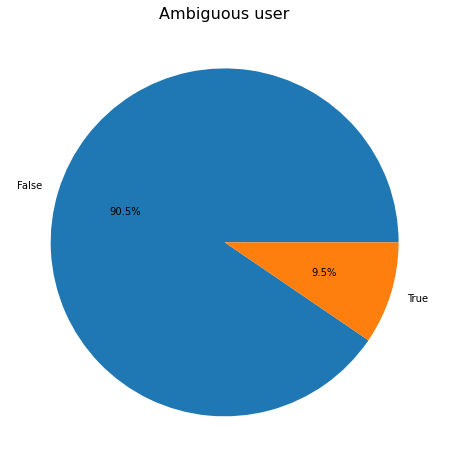

In [7]:
plt.figure(figsize=(16,8))
plt.pie(ambiguous_count['count'], labels=ambiguous_count['ambiguous'], autopct='%.1f%%')
plt.title('Ambiguous user', fontsize=16)
plt.show()

### Explicit the Wikibreaks

In [8]:
english_wikibreaks_refactored_df = list()
# iterating over the previous dataset
for i, row in english_wikibreaks_df.iterrows():
    # explicit the wikibreaks
    for el in row['wikibreaks']:
        new_row = row
        new_row = new_row.drop('wikibreaks')
        new_row['wikibreak'] = el['name']
        new_row['categories'] = el['categories']
        new_row['parameters'] = el['parameters']
        new_row['subcategory'] = el['subcategory']
        if el['to_date']:
            new_row['to_date'] = datetime.fromisoformat(el['to_date'])
        else:
            new_row['to_date'] = None
        new_row['from_date'] = datetime.fromisoformat(el['from_date'])
        english_wikibreaks_refactored_df.append(new_row)
english_wikibreaks_refactored_df = pd.DataFrame(english_wikibreaks_refactored_df).reset_index(drop=True)
# english_wikibreaks_refactored_df.head()

In [9]:
english_wikibreaks_refactored_df.shape

(60647, 11)

## Number of users still in wikibreaks or similar

In [10]:
still_in_breaks = english_wikibreaks_refactored_df.loc[pd.isnull(english_wikibreaks_refactored_df['to_date']), ['name', 'wikibreak', 'categories', 'subcategory']]
# still_in_breaks.head()

In [11]:
# still_in_breaks.describe()

In [12]:
users_still_in_breaks = still_in_breaks.groupby('name').count().reset_index()
# users_still_in_breaks.head()

In [13]:
users_still_in_breaks.describe()

wikibreak    categories   subcategory
count  12228.000000  12228.000000  12228.000000
mean       1.163477      1.163477      1.163477
std        0.415435      0.415435      0.415435
min        1.000000      1.000000      1.000000
25%        1.000000      1.000000      1.000000
50%        1.000000      1.000000      1.000000
75%        1.000000      1.000000      1.000000
max       10.000000     10.000000     10.000000

## Number of users still in wikibreaks with respect to the total amount of users who specified at least a wikibreak during their wikihistory

In [14]:
english_wikibreaks_df.shape[0]

22082

In [15]:
users_still_in_breaks.shape[0]

12228

In [16]:
row_total = {'total': english_wikibreaks_df.shape[0] - users_still_in_breaks.shape[0], 'label': 'not in break'}
row_break = {'total': users_still_in_breaks.shape[0], 'label': 'in break'}
rows = [row_total, row_break]
percentage_still_in_break = pd.DataFrame(rows).reset_index(drop=True)
percentage_still_in_break

total         label
0   9854  not in break
1  12228      in break

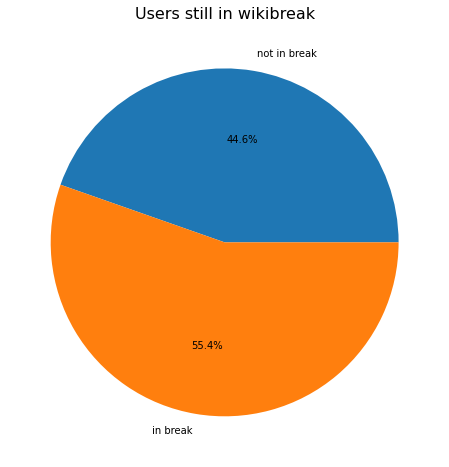

In [17]:
plt.figure(figsize=(16,8))
plt.pie(percentage_still_in_break['total'], labels=percentage_still_in_break['label'], autopct='%.1f%%')
plt.title('Users still in wikibreak', fontsize=16)
plt.show()

## Current wikibreaks templates

In [18]:
wikibreaks_still_in_breaks = still_in_breaks
wikibreaks_still_in_breaks['count'] = 1
wikibreaks_still_in_breaks = wikibreaks_still_in_breaks[['wikibreak', 'count']].groupby('wikibreak').count().reset_index()
wikibreaks_still_in_breaks.head()

wikibreak  count
0     at school     59
1      atschool    504
2        bonked     12
3          busy   2222
4  can't retire     28

In [19]:
wikibreaks_still_in_breaks.shape

(35, 2)

In [20]:
wikibreaks_still_in_breaks.describe()

count
count    35.000000
mean    406.485714
std    1125.486440
min       1.000000
25%       2.000000
50%      18.000000
75%     141.500000
max    5982.000000

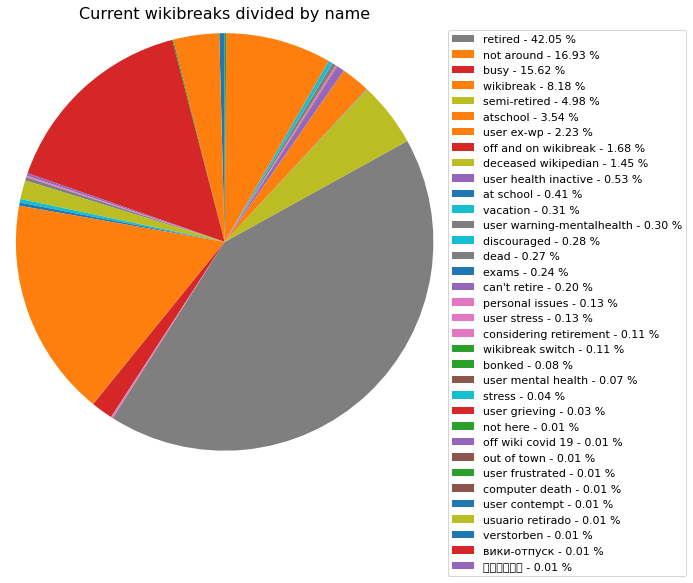

In [155]:
plt.figure(figsize=(16, 8))
plt.title('Current wikibreaks divided by name', fontsize=16)

wikibreaks = wikibreaks_still_in_breaks['wikibreak']
values = wikibreaks_still_in_breaks['count']
percentage = 100.*values/values.sum()

patches, texts = plt.pie(values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(wikibreaks, percentage)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(1, 1), fontsize=11)
plt.show()

## Current subcategories

In [22]:
subcategories_still_in_breaks = still_in_breaks
subcategories_still_in_breaks['count'] = 1
subcategories_still_in_breaks = subcategories_still_in_breaks[['subcategory', 'count']].groupby('subcategory').count().reset_index().sort_values(['count'], ascending=False)
subcategories_still_in_breaks.head()

subcategory  count
15       retired   5984
0     Not around   2410
3           busy   2222
25     wikibreak   1165
16  semi-retired    709

In [23]:
subcategories_still_in_breaks.shape

(26, 2)

In [24]:
subcategories_still_in_breaks.describe()

count
count    26.000000
mean    547.192308
std    1283.421646
min       1.000000
25%      13.000000
50%      37.000000
75%     299.250000
max    5984.000000

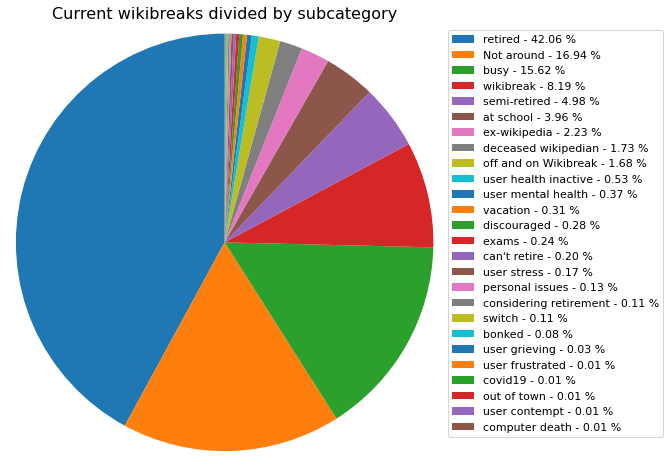

In [25]:
plt.figure(figsize=(16, 8))
plt.title('Current wikibreaks divided by subcategory', fontsize=16)

wikibreaks = subcategories_still_in_breaks['subcategory']
values = subcategories_still_in_breaks['count']
percentage = 100.*values/values.sum()

patches, texts = plt.pie(values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(wikibreaks, percentage)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(1, 1), fontsize=11)
plt.show()

## Current categories

In [26]:
categories_still_in_breaks = still_in_breaks[['categories', 'name']]
categories_still_in_breaks_refactored = list()
for i, row in categories_still_in_breaks.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories_still_in_breaks_refactored.append(new_row)
categories_still_in_breaks_refactored = pd.DataFrame(categories_still_in_breaks_refactored).reset_index(drop=True)
# categories_still_in_breaks_refactored.head()

In [27]:
categories_still_in_breaks_refactored = categories_still_in_breaks_refactored
categories_still_in_breaks_refactored['count'] = 1
categories_still_in_breaks_refactored = categories_still_in_breaks_refactored[['category', 'count']].groupby('category').count().reset_index().sort_values(['count'], ascending=False)
categories_still_in_breaks_refactored.head()

category  count
4           other   9666
3          mental   2341
1           break   1842
0        back/not    283
2  health related    170

In [28]:
categories_still_in_breaks_refactored.shape

(6, 2)

In [29]:
categories_still_in_breaks_refactored.describe()

count
count     6.000000
mean   2383.833333
std    3696.425918
min       1.000000
25%     198.250000
50%    1062.500000
75%    2216.250000
max    9666.000000

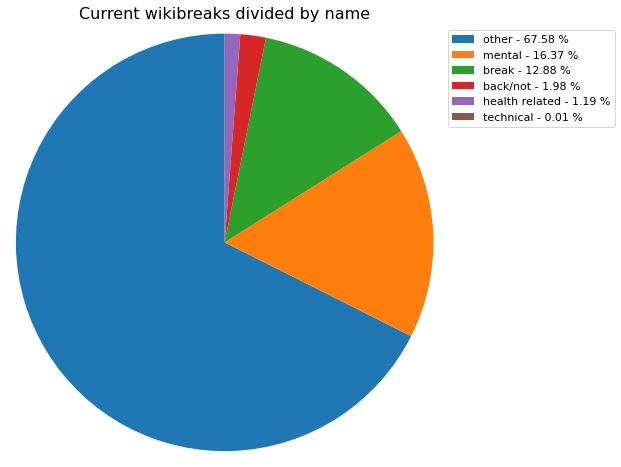

In [30]:
plt.figure(figsize=(16, 8))
plt.title('Current wikibreaks divided by name', fontsize=16)

wikibreaks = categories_still_in_breaks_refactored['category']
values = categories_still_in_breaks_refactored['count']
percentage = 100.*values/values.sum()

patches, texts = plt.pie(values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(wikibreaks, percentage)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(1, 1), fontsize=11)
plt.show()

# Line graph to see the flow of wikibreaks in English Wikipedia

In [31]:
# unique wikibreaks
# THE NON RENDERING FONT IS https://www.wikidata.org/wiki/Q5848674
wikibreaks = english_wikibreaks_refactored_df['wikibreak'].unique()
wikibreaks

array(['retired', 'busy', 'wikibreak', 'not around', 'bonked', 'vacation',
       'user stress', 'exams', 'off and on wikibreak',
       'user health inactive', 'user warning-mentalhealth', 'not here',
       'user ex-wp', 'semi-retired', 'stress', 'out of town', 'atschool',
       "can't retire", 'no internet', 'personal issues', 'discouraged',
       'deceased wikipedian', 'considering retirement', 'user frustrated',
       'at school', 'dead', 'wikibreak-in-house', 'computer death',
       'user grieving', 'user contempt', 'user mental health',
       'wikibreak switch', 'user wikibreak', 'off wiki covid 19',
       'usuario retirado', 'pengguna sibuk', 'wikibreak débordé',
       'পরীক্ষা', 'deaktiviert', 'vikimola', 'no power', '위키백과탈퇴',
       'مشغول', 'occupato', 'cutiwiki', 'user wikibreak wide',
       'verstorben', 'vertrokken', 'retirado', 'semester', 'вики-отпуск'],
      dtype=object)

In [32]:
# unique subcategories
subcategories = english_wikibreaks_refactored_df['subcategory'].unique()
subcategories

array(['retired', 'busy', 'wikibreak', 'Not around', 'bonked', 'vacation',
       'user stress', 'exams', 'off and on Wikibreak',
       'user health inactive', 'user mental health', 'ex-wikipedia',
       'semi-retired', 'out of town', 'at school', "can't retire",
       'no internet', 'personal issues', 'discouraged',
       'deceased wikipedian', 'considering retirement', 'user frustrated',
       'in-house', 'computer death', 'user grieving', 'user contempt',
       'switch', 'covid19', 'no power'], dtype=object)

In [33]:
# unique categories
categories = list()
for i, row in english_wikibreaks_refactored_df[['categories', 'name']].iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories.append(new_row)
categories = pd.DataFrame(categories).reset_index(drop=True)
categories = categories['category'].unique()
categories

array(['other', 'mental', 'break', 'health related', 'back/not',
       'technical'], dtype=object)

In [34]:
# date to start from
start_from = english_wikibreaks_refactored_df['from_date'].min()
start_from

Timestamp('2005-04-08 00:33:47+0000', tz='UTC')

In [35]:
last_date = datetime.now().replace(tzinfo=pytz.UTC)
last_date

datetime.datetime(2021, 5, 10, 20, 32, 16, 905277, tzinfo=<UTC>)

In [36]:
breaks_history = list()
english_wikibreaks_simple_date = english_wikibreaks_refactored_df
english_wikibreaks_simple_date['from_date'] = english_wikibreaks_simple_date['from_date'].dt.normalize()
english_wikibreaks_simple_date['from_date'] = english_wikibreaks_simple_date['from_date'].apply(lambda r: r.replace(day=1))
english_wikibreaks_simple_date['to_date'] = english_wikibreaks_simple_date['to_date'].dt.normalize()
english_wikibreaks_simple_date['to_date'] = english_wikibreaks_simple_date['to_date'].apply(lambda r: r.replace(day=1))
# iterating over years
for year in range(start_from.year, last_date.year + 1):
    if year == start_from.year: # first year
        start_month = start_from.month
    else:
        start_month = 1
    
    if year == last_date.year: # last year
        last_month = last_date.month
    else:
        last_month = 12
    
    for month in range(start_month, last_month + 1):
        mask = (english_wikibreaks_simple_date['from_date'] <= datetime(year, month, 1).replace(tzinfo=pytz.UTC))
        mask_2 = (pd.isnull(english_wikibreaks_simple_date['to_date'])) | (english_wikibreaks_simple_date['to_date'] >= datetime(year, month, 1).replace(tzinfo=pytz.UTC)) 
        mask = mask & mask_2
        filtered = english_wikibreaks_simple_date[mask]
        for j, elem in filtered.iterrows():
            el = dict()
            el['year'] = year
            el['month'] = month
            el['subcategory'] = elem['subcategory']
            el['wikibreak'] = elem['wikibreak']
            el['categories'] = elem['categories']
            breaks_history.append(el)
breaks_history = pd.DataFrame(breaks_history).reset_index(drop=True)
breaks_history.head()

year  month          subcategory wikibreak categories
0  2005      4  deceased wikipedian      dead    [other]
1  2005      4  deceased wikipedian      dead    [other]
2  2005      5  deceased wikipedian      dead    [other]
3  2005      5  deceased wikipedian      dead    [other]
4  2005      6  deceased wikipedian      dead    [other]

In [37]:
breaks_history.shape

(1272859, 5)

In [38]:
breaks_history.describe()

year         month
count  1.272859e+06  1.272859e+06
mean   2.015684e+03  6.440423e+00
std    3.735583e+00  3.469933e+00
min    2.005000e+03  1.000000e+00
25%    2.013000e+03  3.000000e+00
50%    2.016000e+03  6.000000e+00
75%    2.019000e+03  9.000000e+00
max    2.021000e+03  1.200000e+01

In [39]:
breaks_history_subcategory_count = breaks_history
breaks_history_subcategory_count['count'] = 1
breaks_history_subcategory_count = breaks_history_subcategory_count[['year', 'month', 'subcategory', 'count']].groupby(['year', 'month',  'subcategory']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_subcategory_count['date'] = pd.to_datetime(breaks_history_subcategory_count[['year','month']].assign(day=1)).dt.date
breaks_history_subcategory_count.head()

year  month          subcategory  count        date
0  2005      4  deceased wikipedian      2  2005-04-01
1  2005      5  deceased wikipedian      2  2005-05-01
2  2005      6  deceased wikipedian      1  2005-06-01
3  2005      7  deceased wikipedian      1  2005-07-01
4  2005      8  deceased wikipedian      1  2005-08-01

In [40]:
breaks_history_subcategory_count.tail()

year  month           subcategory  count        date
3665  2021      5  user health inactive     76  2021-05-01
3666  2021      5    user mental health     52  2021-05-01
3667  2021      5           user stress     24  2021-05-01
3668  2021      5              vacation     44  2021-05-01
3669  2021      5             wikibreak   1165  2021-05-01

In [41]:
breaks_history_subcategory_count.describe()

year        month        count
count  3670.000000  3670.000000  3670.000000
mean   2014.343597     6.464578   346.828065
std       4.127952     3.455471   782.785724
min    2005.000000     1.000000     1.000000
25%    2011.000000     3.000000    11.000000
50%    2015.000000     6.000000    41.000000
75%    2018.000000     9.000000   287.000000
max    2021.000000    12.000000  6031.000000

#### Clean counter

In [42]:
breaks_history_subcategory_count_cleaned = list()
for date in breaks_history_subcategory_count['date'].unique():
    for subcat in subcategories:
        elem = breaks_history_subcategory_count.loc[(breaks_history_subcategory_count['date'] == date) & (breaks_history_subcategory_count['subcategory'] == subcat)]
        if elem.empty:
            breaks_history_subcategory_count_cleaned.append([date.year, date.month, subcat, 0, date])
        else:
            breaks_history_subcategory_count_cleaned.append(np.array(elem)[0])
breaks_history_subcategory_count_cleaned = pd.DataFrame(breaks_history_subcategory_count_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'subcategory', 'count', 'date'], axis=1)
breaks_history_subcategory_count_cleaned.head()

year  month subcategory  count        date
0  2005      4     retired      0  2005-04-01
1  2005      4        busy      0  2005-04-01
2  2005      4   wikibreak      0  2005-04-01
3  2005      4  Not around      0  2005-04-01
4  2005      4      bonked      0  2005-04-01

## Subcategories during English Wikipedia history

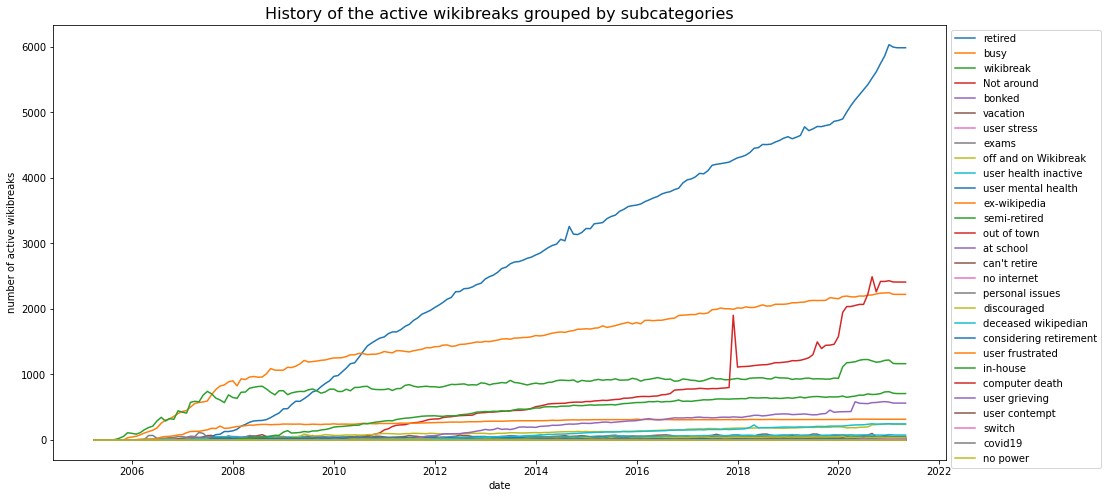

In [43]:
plt.figure(figsize=(16,8))
for subcategory in breaks_history_subcategory_count_cleaned['subcategory'].unique():
    subcat = breaks_history_subcategory_count_cleaned[breaks_history_subcategory_count_cleaned['subcategory'] == subcategory]
    plt.plot(subcat['date'], subcat['count'], label = subcategory)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('History of the active wikibreaks grouped by subcategories', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [44]:
fig = px.line(breaks_history_subcategory_count_cleaned, x='date', y='count', color='subcategory', title='History of the active wikibreaks grouped by subcategories')
fig.show()

The same but with the names of the pauses

In [45]:
breaks_history_wikibreak_count = breaks_history
breaks_history_wikibreak_count['count'] = 1
breaks_history_wikibreak_count = breaks_history_wikibreak_count[['year', 'month', 'wikibreak', 'count']].groupby(['year', 'month', 'wikibreak']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_wikibreak_count['date'] = pd.to_datetime(breaks_history_wikibreak_count[['year','month']].assign(day=1)).dt.date
breaks_history_wikibreak_count.head()

year  month wikibreak  count        date
0  2005      4      dead      2  2005-04-01
1  2005      5      dead      2  2005-05-01
2  2005      6      dead      1  2005-06-01
3  2005      7      dead      1  2005-07-01
4  2005      8      dead      1  2005-08-01

In [46]:
breaks_history_wikibreak_count.tail()

year  month         wikibreak  count        date
4825  2021      5        verstorben      1  2021-05-01
4826  2021      5         wikibreak   1164  2021-05-01
4827  2021      5  wikibreak switch     16  2021-05-01
4828  2021      5       вики-отпуск      1  2021-05-01
4829  2021      5            위키백과탈퇴      1  2021-05-01

In [47]:
breaks_history_wikibreak_count.describe()

year        month        count
count  4830.000000  4830.000000  4830.000000
mean   2014.767702     6.459834   263.531884
std       3.986500     3.461282   696.756948
min    2005.000000     1.000000     1.000000
25%    2012.000000     3.000000     2.000000
50%    2015.000000     6.000000    26.000000
75%    2018.000000     9.000000   124.750000
max    2021.000000    12.000000  6027.000000

#### Clean counter

In [48]:
breaks_history_wikibreak_count_cleaned = list()
for date in breaks_history_wikibreak_count['date'].unique():
    for wb in wikibreaks:
        elem = breaks_history_wikibreak_count.loc[(breaks_history_wikibreak_count['date'] == date) & (breaks_history_wikibreak_count['wikibreak'] == wb)]
        if elem.empty:
            breaks_history_wikibreak_count_cleaned.append([date.year, date.month, wb, 0, date])
        else:
            breaks_history_wikibreak_count_cleaned.append(np.array(elem)[0])
breaks_history_wikibreak_count_cleaned = pd.DataFrame(breaks_history_wikibreak_count_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'wikibreak', 'count', 'date'], axis=1)
breaks_history_wikibreak_count_cleaned.head()

year  month   wikibreak  count        date
0  2005      4     retired      0  2005-04-01
1  2005      4        busy      0  2005-04-01
2  2005      4   wikibreak      0  2005-04-01
3  2005      4  not around      0  2005-04-01
4  2005      4      bonked      0  2005-04-01

## Wikibreaks during English Wikipedia history

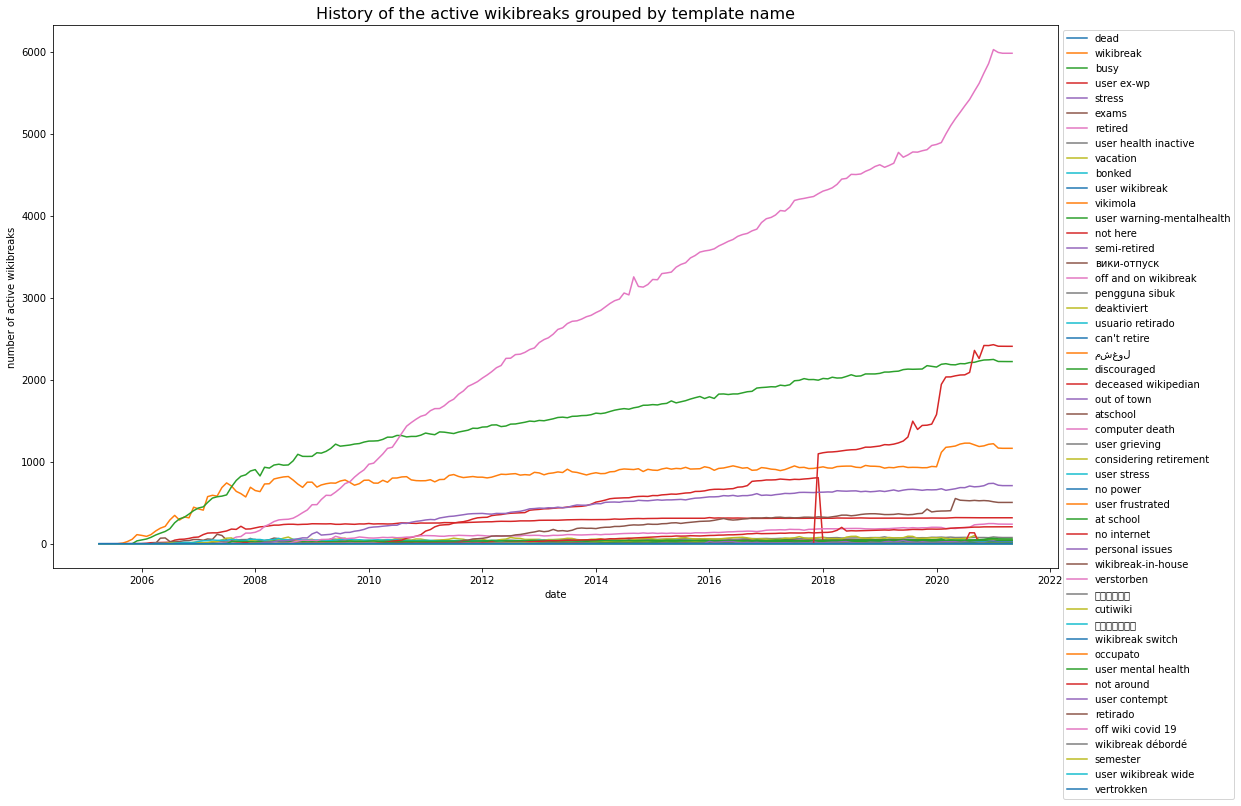

In [49]:
plt.figure(figsize=(18,10))
for wikibreak in breaks_history_wikibreak_count['wikibreak'].unique():
    wb = breaks_history_wikibreak_count_cleaned[breaks_history_wikibreak_count_cleaned['wikibreak'] == wikibreak]
    plt.plot(wb['date'], wb['count'], label = wikibreak)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('History of the active wikibreaks grouped by template name', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [50]:
fig = px.line(breaks_history_wikibreak_count_cleaned, x='date', y='count', color='wikibreak', title='History of the active wikibreaks grouped by template name')
fig.show()

In [51]:
breaks_history_category_count = breaks_history[['year', 'month', 'subcategory', 'categories']]
breaks_history_category_count.head()

year  month          subcategory categories
0  2005      4  deceased wikipedian    [other]
1  2005      4  deceased wikipedian    [other]
2  2005      5  deceased wikipedian    [other]
3  2005      5  deceased wikipedian    [other]
4  2005      6  deceased wikipedian    [other]

In [52]:
breaks_history_category_count_refactored = list()
for i, row in breaks_history_category_count.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        breaks_history_category_count_refactored.append(new_row)
breaks_history_category_count_refactored = pd.DataFrame(breaks_history_category_count_refactored).reset_index(drop=True)
breaks_history_category_count_refactored.head()

year  month          subcategory category
0  2005      4  deceased wikipedian    other
1  2005      4  deceased wikipedian    other
2  2005      5  deceased wikipedian    other
3  2005      5  deceased wikipedian    other
4  2005      6  deceased wikipedian    other

In [53]:
breaks_history_category_count_refactored = breaks_history_category_count_refactored
breaks_history_category_count_refactored['count'] = 1
breaks_history_category_count_refactored = breaks_history_category_count_refactored[['year', 'month', 'category', 'count']].groupby(['year', 'month', 'category']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_category_count_refactored['date'] = pd.to_datetime(breaks_history_category_count_refactored[['year','month']].assign(day=1)).dt.date
breaks_history_category_count_refactored.head()

year  month category  count        date
0  2005      4    other      2  2005-04-01
1  2005      5    other      2  2005-05-01
2  2005      6    other      1  2005-06-01
3  2005      7    other      1  2005-07-01
4  2005      8    other      1  2005-08-01

In [54]:
breaks_history_category_count_refactored.tail()

year  month        category  count        date
1016  2021      5           break   1842  2021-05-01
1017  2021      5  health related    170  2021-05-01
1018  2021      5          mental   2341  2021-05-01
1019  2021      5           other   9666  2021-05-01
1020  2021      5       technical      1  2021-05-01

In [55]:
breaks_history_category_count_refactored.shape

(1021, 5)

In [56]:
breaks_history_wikibreak_count.describe()

year        month        count
count  4830.000000  4830.000000  4830.000000
mean   2014.767702     6.459834   263.531884
std       3.986500     3.461282   696.756948
min    2005.000000     1.000000     1.000000
25%    2012.000000     3.000000     2.000000
50%    2015.000000     6.000000    26.000000
75%    2018.000000     9.000000   124.750000
max    2021.000000    12.000000  6027.000000

#### Clean counter

In [57]:
breaks_history_category_count_refactored_cleaned = list()
for date in breaks_history_category_count_refactored['date'].unique():
    for cat in categories:
        elem = breaks_history_category_count_refactored.loc[(breaks_history_category_count_refactored['date'] == date) & (breaks_history_category_count_refactored['category'] == cat)]
        if elem.empty:
            breaks_history_category_count_refactored_cleaned.append([date.year, date.month, cat, 0, date])
        else:
            breaks_history_category_count_refactored_cleaned.append(np.array(elem)[0])
breaks_history_category_count_refactored_cleaned = pd.DataFrame(breaks_history_category_count_refactored_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'category', 'count', 'date'], axis=1)
breaks_history_category_count_refactored_cleaned.head()

year  month        category  count        date
0  2005      4           other      2  2005-04-01
1  2005      4          mental      0  2005-04-01
2  2005      4           break      0  2005-04-01
3  2005      4  health related      0  2005-04-01
4  2005      4        back/not      0  2005-04-01

## Categories during English Wikipedia history

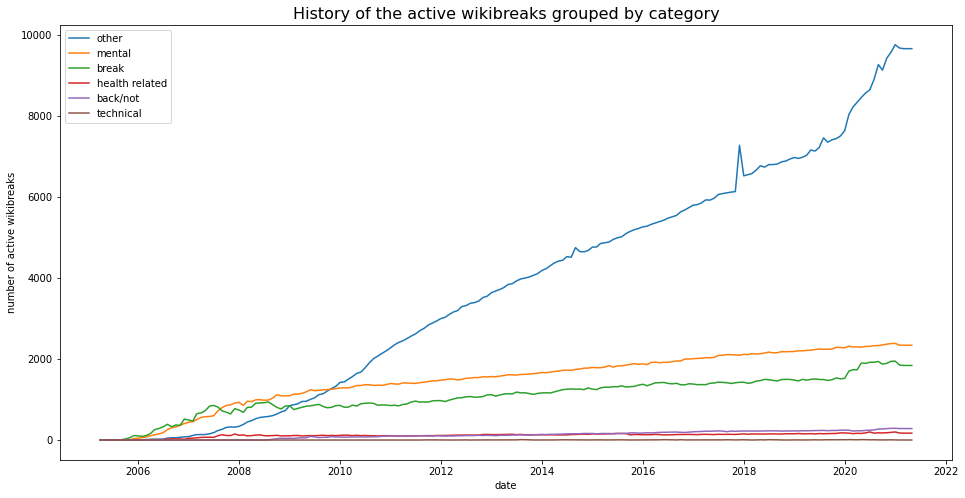

In [58]:
plt.figure(figsize=(16,8))
for cat in breaks_history_category_count_refactored_cleaned['category'].unique():
    category = breaks_history_category_count_refactored_cleaned[breaks_history_category_count_refactored_cleaned['category'] == cat]
    plt.plot(category['date'], category['count'], label = cat)
plt.legend()
plt.title('History of the active wikibreaks grouped by category', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [59]:
fig = px.line(breaks_history_category_count_refactored_cleaned, x='date', y='count', color='category', title='History of the active wikibreaks grouped by category')
fig.show()

## Total number of times a certain template was used

In [60]:
# english_wikibreaks_refactored_df.head()

In [61]:
wikibreak_used = english_wikibreaks_refactored_df
wikibreak_used['count'] = 1
wikibreak_used = wikibreak_used[['wikibreak', 'count']].groupby('wikibreak').count().reset_index().sort_values(['count'], ascending=False)
wikibreak_used.head()

wikibreak  count
43     wikibreak  17632
24       retired  13454
3           busy  10827
26  semi-retired   3174
15    not around   2900

In [62]:
wikibreak_used.shape

(51, 2)

In [63]:
wikibreak_used.describe()

count
count     51.000000
mean    1189.156863
std     3373.058122
min        1.000000
25%        1.000000
50%       98.000000
75%      544.500000
max    17632.000000

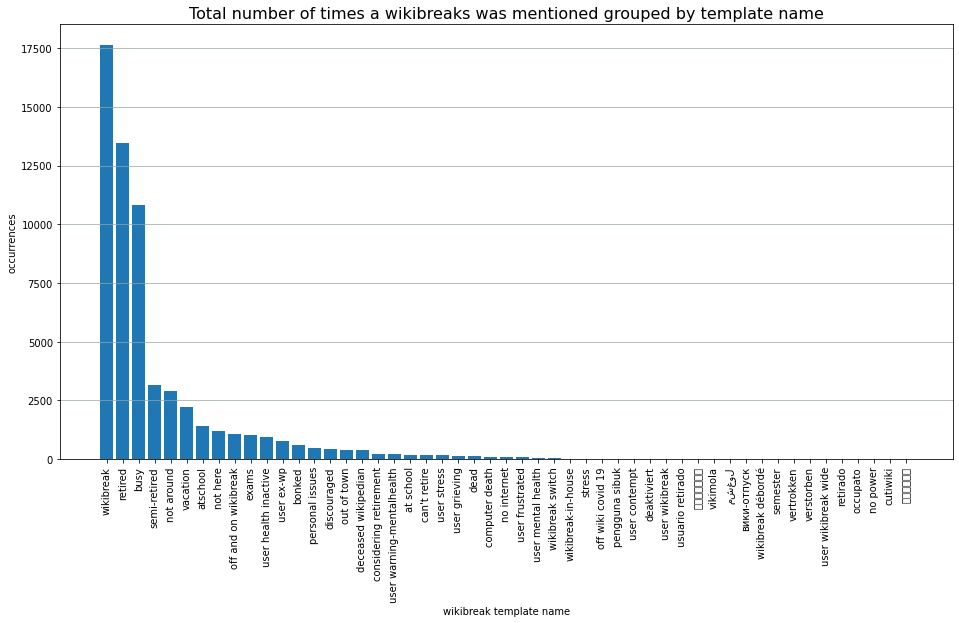

In [64]:
plt.figure(figsize=(16,8))
plt.bar(wikibreak_used['wikibreak'], wikibreak_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total number of times a wikibreaks was mentioned grouped by template name', fontsize=16)
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

## Number of time a certain subcategory was mentioned

In [65]:
subcategory_used = english_wikibreaks_refactored_df
subcategory_used['count'] = 1
subcategory_used = subcategory_used[['subcategory', 'count']].groupby('subcategory').count().reset_index().sort_values(['count'], ascending=False)
subcategory_used.head()

subcategory  count
28     wikibreak  17639
18       retired  13462
3           busy  10834
0     Not around   4100
19  semi-retired   3174

In [66]:
subcategory_used.shape

(29, 2)

In [67]:
subcategory_used.describe()

count
count     29.000000
mean    2091.275862
std     4319.458290
min        1.000000
25%      104.000000
50%      434.000000
75%     1053.000000
max    17639.000000

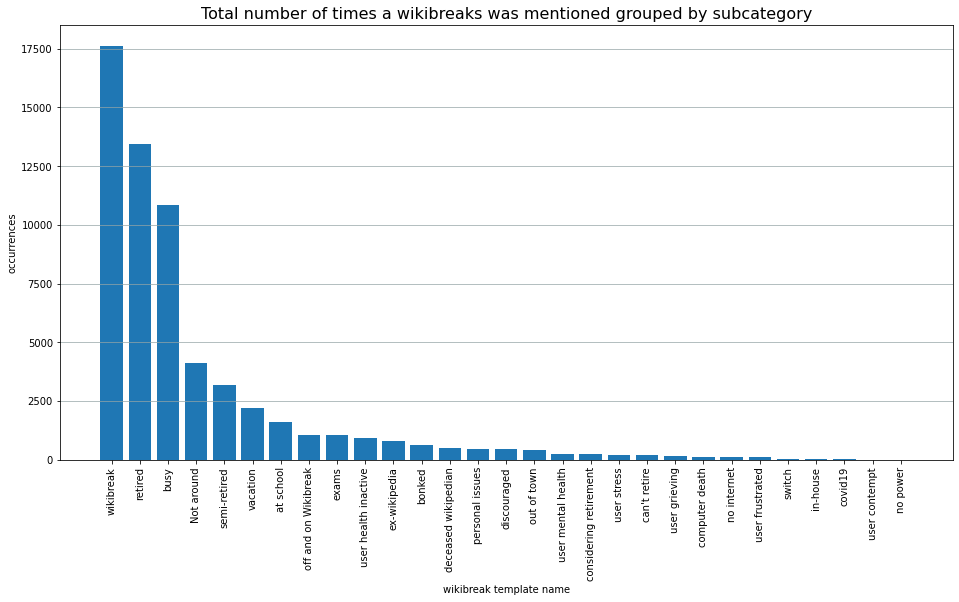

In [68]:
plt.figure(figsize=(16,8))
plt.bar(subcategory_used['subcategory'], subcategory_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.title('Total number of times a wikibreaks was mentioned grouped by subcategory', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

## Number of time a certain category was mentioned

In [69]:
category_used = still_in_breaks[['categories', 'name']]
category_used = list()
for i, row in english_wikibreaks_refactored_df.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        category_used.append(new_row)
category_used = pd.DataFrame(category_used).reset_index(drop=True)
# category_used.head()

In [70]:
category_used['count'] = 1
category_used = category_used[['category', 'count']].groupby('category').count().reset_index().sort_values(['count'], ascending=False)
category_used.head()

category  count
1           break  23425
4           other  22022
3          mental  11816
2  health related   2155
0        back/not   1474

In [71]:
category_used.shape

(6, 2)

In [72]:
category_used.describe()

count
count      6.0000
mean   10182.5000
std    10564.8004
min      203.0000
25%     1644.2500
50%     6985.5000
75%    19470.5000
max    23425.0000

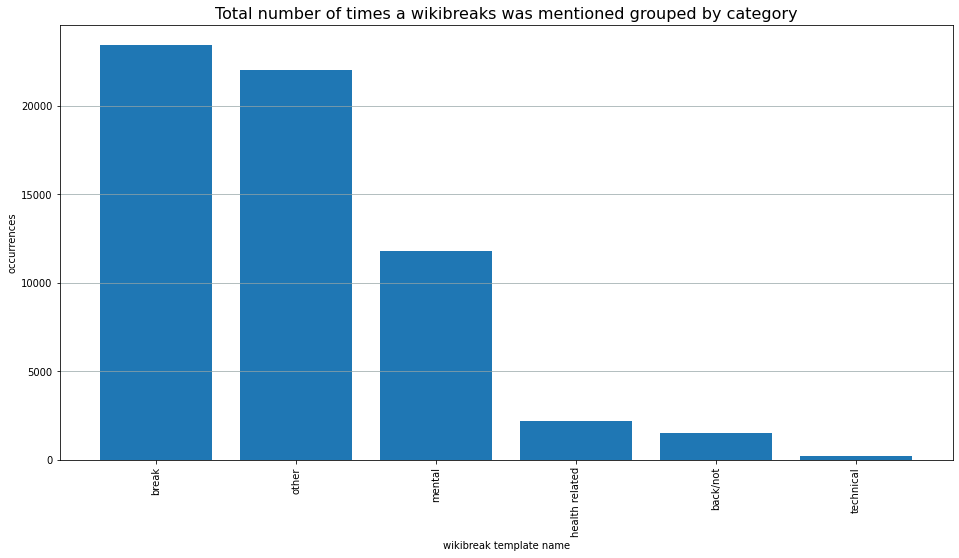

In [73]:
plt.figure(figsize=(16,8))
plt.bar(category_used['category'], category_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total number of times a wikibreaks was mentioned grouped by category', fontsize=16)
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same template)

In [74]:
# english_wikibreaks_refactored_df.head()

In [75]:
users_multiple_times_wikibreak = english_wikibreaks_refactored_df
users_multiple_times_wikibreak['count'] = 1
# users_multiple_times_wikibreak.head()

In [76]:
users_multiple_times_wikibreak = users_multiple_times_wikibreak[['name', 'wikibreak', 'count']].groupby(['name', 'wikibreak']).count().reset_index()
# users_multiple_times_wikibreak.head()

In [77]:
total_users = english_wikibreaks_df.shape[0]
total_users

22082

In [78]:
users_multiple_times_wikibreak = users_multiple_times_wikibreak.loc[users_multiple_times_wikibreak['count'] >= 2]
# users_multiple_times_wikibreak.head()

In [79]:
total_users_multiple = users_multiple_times_wikibreak.shape[0]
total_users_multiple

10327

In [80]:
row_total = {'total': english_wikibreaks_df.shape[0] - total_users_multiple, 'label': 'single time'}
row_multiple = {'total': total_users_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0  11755     single time
1  10327  multiple times

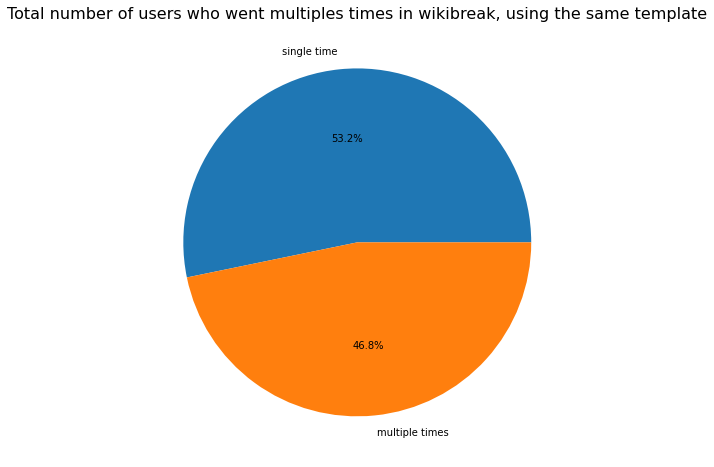

In [81]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using the same template', fontsize=16)
plt.show()

### Remove ambiguous users 

In [82]:
users_multiple_times_wikibreak_not_ambiguous = english_wikibreaks_refactored_df
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.loc[users_multiple_times_wikibreak_not_ambiguous['ambiguous'] == False, ['name', 'wikibreak']]
users_multiple_times_wikibreak_not_ambiguous['count'] = 1
# users_multiple_times_wikibreak_not_ambiguous.head()

In [83]:
users_multiple_times_wikibreak_not_ambiguous.shape

(45706, 3)

In [84]:
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous[['name', 'wikibreak', 'count']].groupby(['name', 'wikibreak']).count().reset_index()
# users_multiple_times_wikibreak_not_ambiguous.head()

In [85]:
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.loc[users_multiple_times_wikibreak_not_ambiguous['count'] >= 2]
# users_multiple_times_wikibreak_not_ambiguous.head()

In [86]:
total_users_multiple_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.shape[0]
total_users_multiple_wikibreak_not_ambiguous

6900

Still over the total amount of users

In [87]:
row_total = {'total': english_wikibreaks_df.shape[0] - total_users_multiple_wikibreak_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_users_multiple_wikibreak_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0  15182     single time
1   6900  multiple times

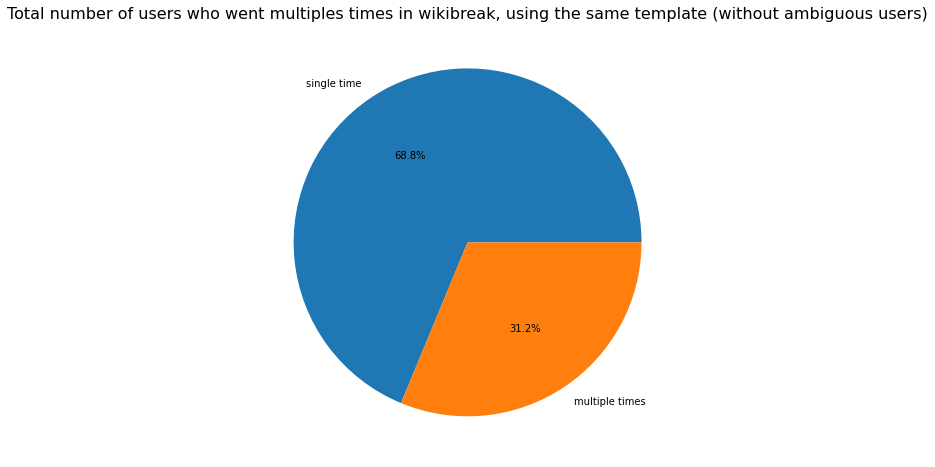

In [88]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using the same template (without ambiguous users)', fontsize=16)
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same subcategory)

In [89]:
# english_wikibreaks_refactored_df.head()

In [90]:
users_multiple_times_subcategory = english_wikibreaks_refactored_df
users_multiple_times_subcategory['count'] = 1
# users_multiple_times_subcategory.head()

In [91]:
users_multiple_times_subcategory.shape

(60647, 11)

In [92]:
users_multiple_times_subcategory = users_multiple_times_subcategory[['name', 'subcategory', 'count']].groupby(['name', 'subcategory']).count().reset_index()
# users_multiple_times_subcategory.head()

In [93]:
users_multiple_times_subcategory = users_multiple_times_subcategory.loc[users_multiple_times_subcategory['count'] >= 2]
# users_multiple_times_subcategory.head()

In [94]:
total_users_multiple = users_multiple_times_wikibreak.shape[0]
total_users_multiple

10327

In [95]:
row_total = {'total': english_wikibreaks_df.shape[0] - total_users_multiple, 'label': 'single time'}
row_multiple = {'total': total_users_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0  11755     single time
1  10327  multiple times

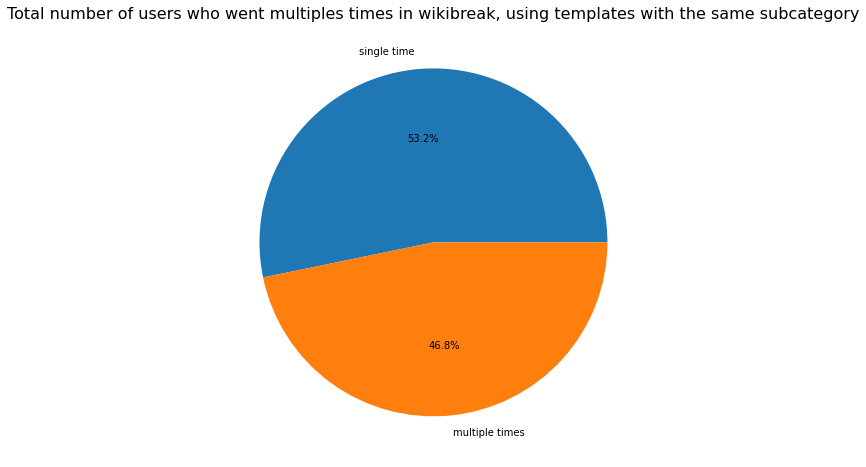

In [96]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same subcategory', fontsize=16)
plt.show()

### Remove ambiguous users 

In [97]:
users_multiple_times_subcategory_not_ambiguous = english_wikibreaks_refactored_df
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.loc[users_multiple_times_subcategory_not_ambiguous['ambiguous'] == False, ['name', 'subcategory']]
users_multiple_times_subcategory_not_ambiguous['count'] = 1
# users_multiple_times_subcategory_not_ambiguous.head()

In [98]:
users_multiple_times_subcategory_not_ambiguous.shape

(45706, 3)

In [99]:
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous[['name', 'subcategory', 'count']].groupby(['name', 'subcategory']).count().reset_index()
# users_multiple_times_subcategory_not_ambiguous.head()

In [100]:
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.loc[users_multiple_times_subcategory_not_ambiguous['count'] >= 2]
# users_multiple_times_subcategory_not_ambiguous.head()

In [101]:
total_users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.shape[0]
total_users_multiple_times_subcategory_not_ambiguous

7701

Still over the total

In [102]:
row_total = {'total': english_wikibreaks_df.shape[0] - total_users_multiple_times_subcategory_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_users_multiple_times_subcategory_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0  14381     single time
1   7701  multiple times

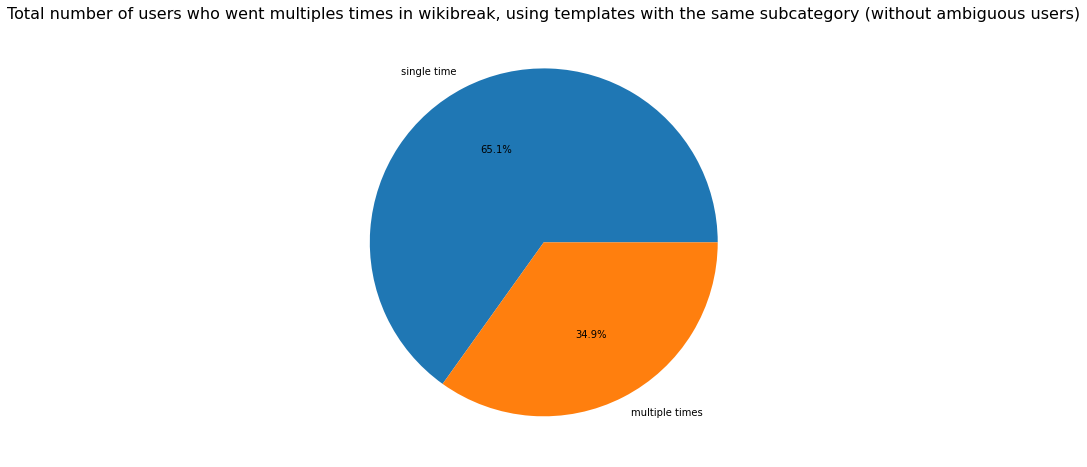

In [103]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same subcategory (without ambiguous users)', fontsize=16)
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same category)

In [104]:
# english_wikibreaks_refactored_df.head()

#### Explicit the category

In [105]:
categories_multiple_times = english_wikibreaks_refactored_df[['categories', 'name']]
categories_multiple_times_refactored = list()
for i, row in english_wikibreaks_refactored_df.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories_multiple_times_refactored.append(new_row)
categories_multiple_times_refactored = pd.DataFrame(categories_multiple_times_refactored).reset_index(drop=True)
# categories_multiple_times_refactored.head()

In [106]:
categories_multiple_times.shape

(60647, 2)

In [107]:
categories_multiple_times_refactored = categories_multiple_times_refactored
categories_multiple_times_refactored['count'] = 1
# categories_multiple_times_refactored.head()

In [108]:
categories_multiple_times_refactored = categories_multiple_times_refactored[['name', 'category', 'count']].groupby(['name', 'category']).count().reset_index()
# categories_multiple_times_refactored.head()

In [109]:
categories_multiple_times_refactored = categories_multiple_times_refactored.loc[categories_multiple_times_refactored['count'] >= 2]
# categories_multiple_times_refactored.head()

In [110]:
total_category_multiple = categories_multiple_times_refactored.shape[0]
total_category_multiple

11009

In [111]:
row_total = {'total': english_wikibreaks_df.shape[0] - total_category_multiple, 'label': 'single time'}
row_multiple = {'total': total_category_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0  11073     single time
1  11009  multiple times

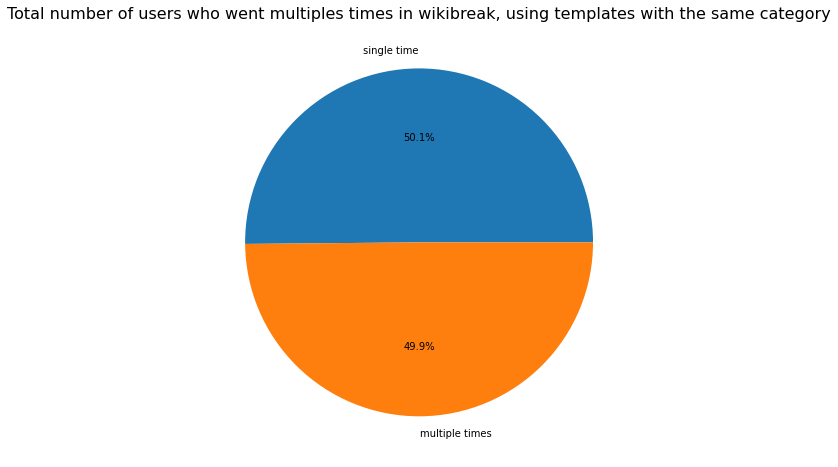

In [112]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same category', fontsize=16)
plt.show()

### Remove ambiguous users 

In [113]:
users_multiple_times_category_not_ambiguous = english_wikibreaks_refactored_df
users_multiple_times_category_not_ambiguous = users_multiple_times_category_not_ambiguous.loc[users_multiple_times_category_not_ambiguous['ambiguous'] == False, ['name', 'categories']]
users_multiple_times_category_not_ambiguous['count'] = 1
# users_multiple_times_category_not_ambiguous.head()

In [114]:
users_multiple_times_category_not_ambiguous_refactored = list()
for i, row in users_multiple_times_category_not_ambiguous.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        users_multiple_times_category_not_ambiguous_refactored.append(new_row)
users_multiple_times_category_not_ambiguous_refactored = pd.DataFrame(users_multiple_times_category_not_ambiguous_refactored).reset_index(drop=True)
# users_multiple_times_category_not_ambiguous_refactored.head()

In [115]:
users_multiple_times_category_not_ambiguous_refactored.shape

(46050, 3)

In [116]:
users_multiple_times_category_not_ambiguous_refactored = users_multiple_times_category_not_ambiguous_refactored[['name', 'category', 'count']].groupby(['name', 'category']).count().reset_index()
# users_multiple_times_category_not_ambiguous_refactored.head()

In [117]:
users_multiple_times_category_not_ambiguous_refactored = users_multiple_times_category_not_ambiguous_refactored.loc[users_multiple_times_category_not_ambiguous_refactored['count'] >= 2]
# users_multiple_times_category_not_ambiguous_refactored.head()

In [118]:
total_category_multiple_not_ambiguous = users_multiple_times_category_not_ambiguous_refactored.shape[0]
total_category_multiple_not_ambiguous

7977

In [119]:
row_total = {'total': english_wikibreaks_df.shape[0] - total_category_multiple_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_category_multiple_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0  14105     single time
1   7977  multiple times

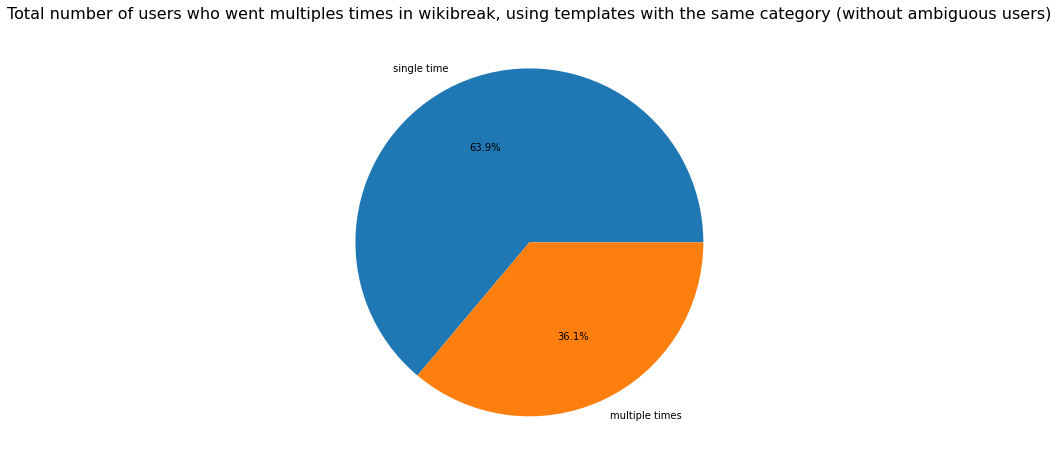

In [120]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same category (without ambiguous users)', fontsize=16)

plt.show()

# Parameters analysis

In [121]:
# english_wikibreaks_refactored_df.head()

## Explicit the parameters associated with the wikibreak considering each wikibreak of each user

In [122]:
parameters_explicited = list()
for i, row in english_wikibreaks_refactored_df.iterrows():
    for el in row['parameters']:
        new_row = row
        new_row = new_row.drop('parameters')
        new_row['parameters'] = el['options']
        parameters_explicited.append(new_row)
parameters_explicited = pd.DataFrame(parameters_explicited).reset_index(drop=True)
# parameters_explicited.head()

### Wikibreak analysis

In [170]:
wikibreaks_parameters_df_list = list()

for wikibreak in wikibreaks:
    tmp_df = parameters_explicited.loc[parameters_explicited['wikibreak'] == wikibreak, ['name', 'parameters', 'count', 'wikibreak']]
    wikibreaks_parameters_df_list.append(tmp_df.reset_index(drop=True))

In [124]:
# wikibreaks_parameters_df_list[0].head()

Empty or filled parameters

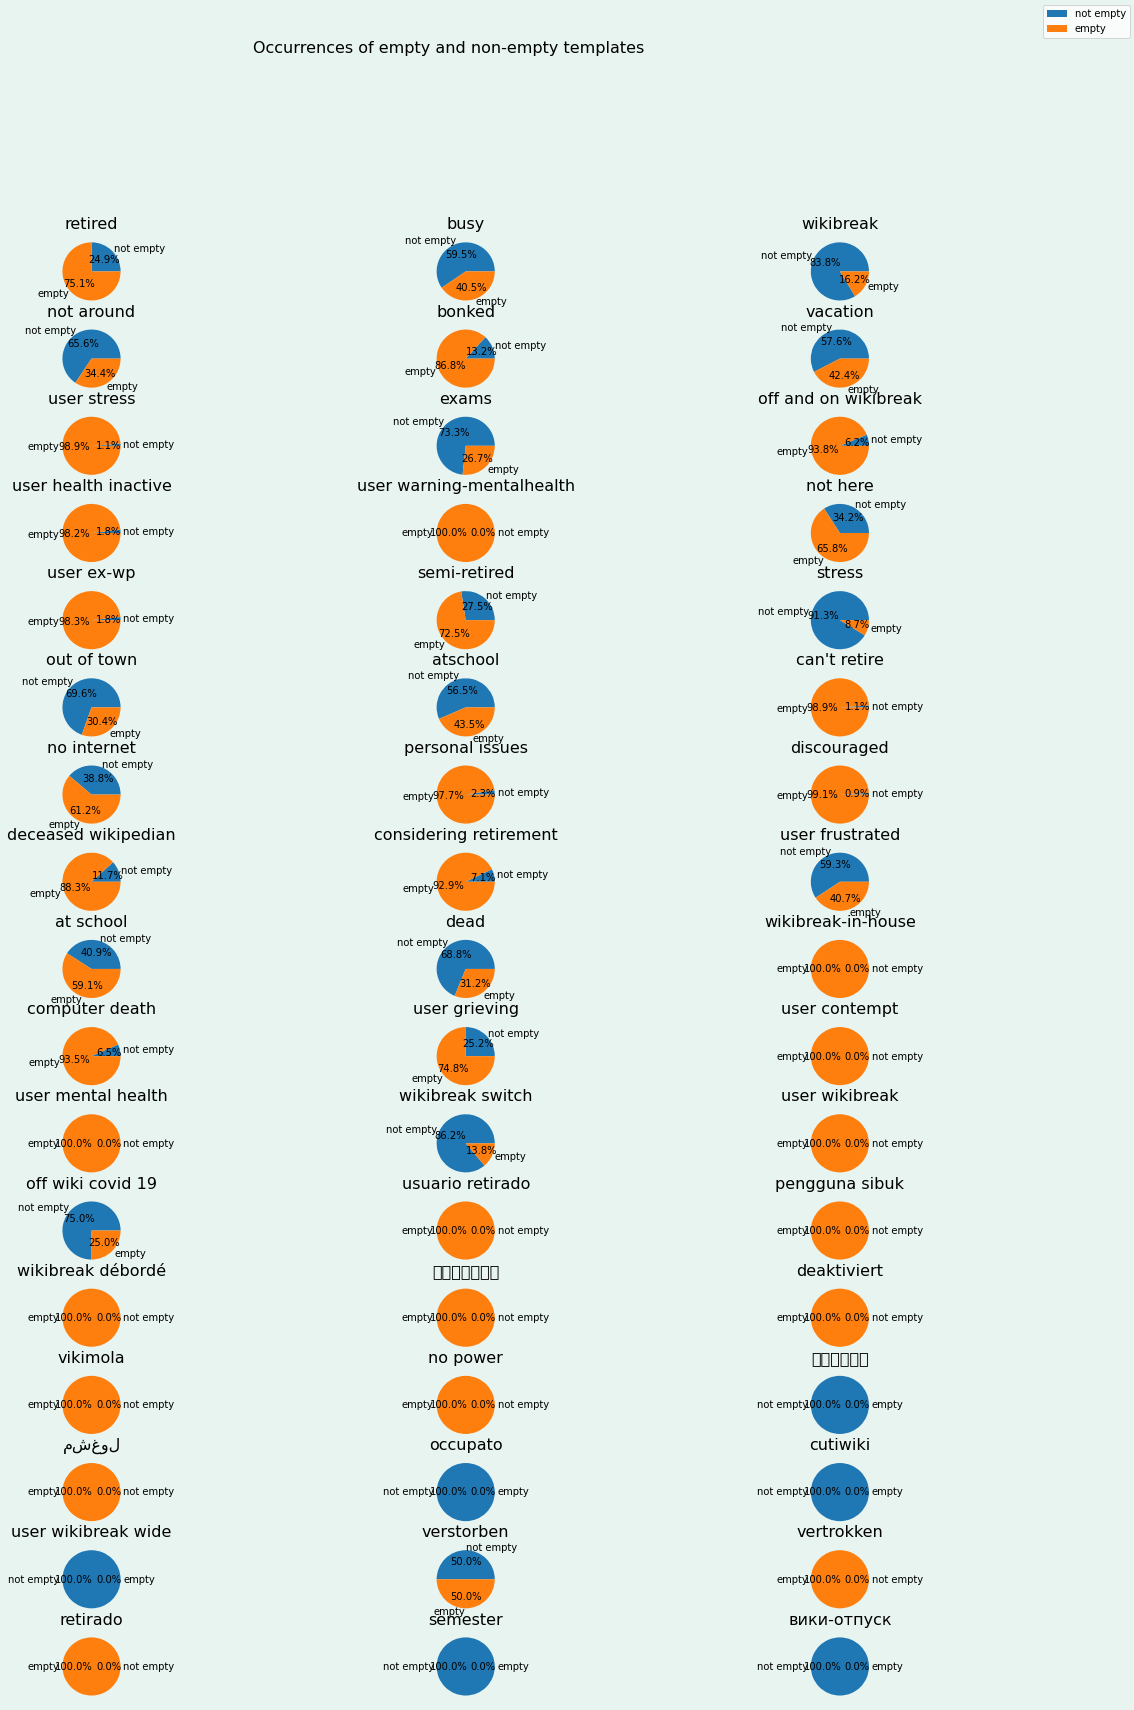

In [142]:
fig, axes = plt.subplots(math.ceil(len(wikibreaks)/3), 3, figsize=(19, 27), facecolor='#e8f4f0', squeeze=False)

last_axes = None


for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = wikibreaks_parameters_df_list[i]
    grouped = extracted.loc[extracted['parameters'] == {}, ['wikibreak', 'parameters', 'count']].groupby(['wikibreak']).count().reset_index(drop=True)
    total_empty = grouped['count']
    
    if not total_empty.empty:
        total_empty = total_empty[0]
    else:
        total_empty = 0
    
    # total empty over total
    row_total = {'total': extracted.shape[0] - total_empty, 'label': 'not empty'}
    row_empty = {'total': total_empty, 'label': 'empty'}
    rows = [row_total, row_empty]
    percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
    
    # figure
    ax = axes[i // 3, i % 3]
    ax.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
    ax.set_title(wikibreak, fontsize=16)
    
    last_axes = i % 3
    
for i in range((math.ceil(len(wikibreaks)/3) - 1) * 3 + last_axes + 1, math.ceil(len(wikibreaks)/3) * 3):
    fig.delaxes(axes.flatten()[i])

fig.suptitle('Occurrences of empty and non-empty templates', fontsize=16)
fig.legend(['not empty', 'empty'])
plt.show()

Total filled over parameterized

In [126]:
total_without_parameters = parameters_explicited.loc[parameters_explicited['parameters'] == {}, ['wikibreak', 'parameters', 'count']]
total_without_parameters.head()

wikibreak parameters  count
0    retired         {}      1
1       busy         {}      1
4    retired         {}      1
5    retired         {}      1
8  wikibreak         {}      1

In [127]:
row_total = {'total': parameters_explicited.shape[0] - total_without_parameters.shape[0], 'label': 'not empty'}
row_empty = {'total': total_without_parameters.shape[0], 'label': 'empty'}
rows = [row_total, row_empty]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times.head()

total      label
0  57590  not empty
1  38593      empty

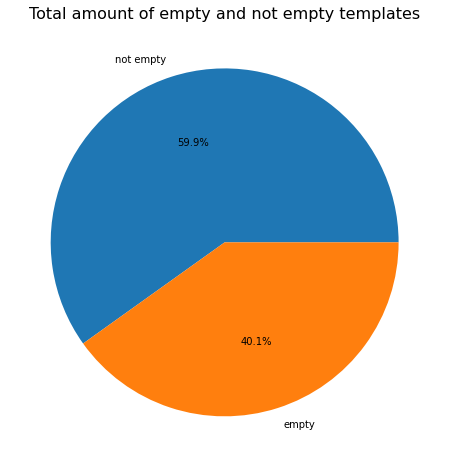

In [128]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total amount of empty and not empty templates', fontsize=16)
plt.show()

## Most used parameter per template

In [171]:
# dataframes for wikibreaks with param name and value
last_axes = None
most_used_parameters_per_template_df_list = list()

for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = wikibreaks_parameters_df_list[i]
    grouped = extracted.loc[extracted['parameters'] != {}, ['wikibreak', 'parameters', 'count']]
    most_used_parameters_per_template_list = list()
    for i, row in extracted.iterrows():
        for key, value in row['parameters'].items():
            new_row = row
            new_row = new_row.drop('parameters')
            new_row['param_name'] = key
            new_row['param_value'] = value
            most_used_parameters_per_template_list.append(new_row)
    most_used_parameters_per_template_df_list.append(pd.DataFrame(most_used_parameters_per_template_list).reset_index(drop=True))

#most_used_parameters_per_template_df_list[0].head()

In [137]:
most_used_parameters_per_template_df_list[0].shape

(6129, 5)

In [181]:
most_used_parameters_per_template_grouped_df_list = list()
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        extracted['param_name'] = extracted['param_name'].str.strip()
        extracted['param_value'] = extracted['param_value'].str.strip()
        extracted = extracted[['count', 'wikibreak', 'param_name']].groupby(['param_name', 'wikibreak']).count().reset_index(drop=False)
    most_used_parameters_per_template_grouped_df_list.append(extracted)
most_used_parameters_per_template_grouped_df_list[0].head()

param_name  wikibreak  count
0                1  at school      2
1            exams  at school     48
2  institutionname  at school      8
3             name  at school      8
4       returndate  at school     14

## Most used parameters per wikibreak

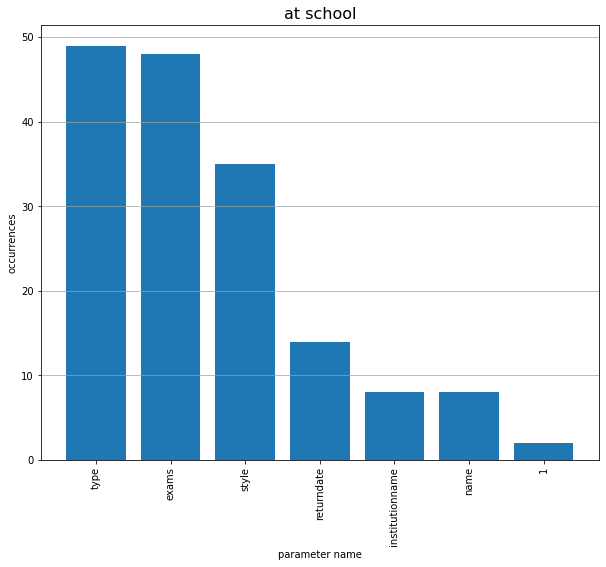

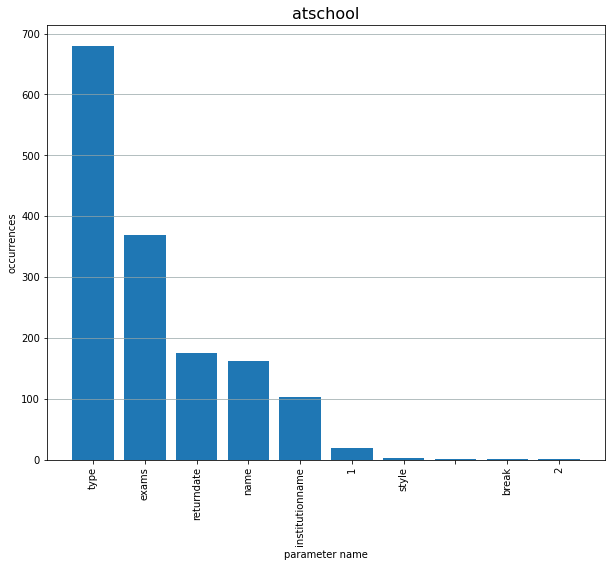

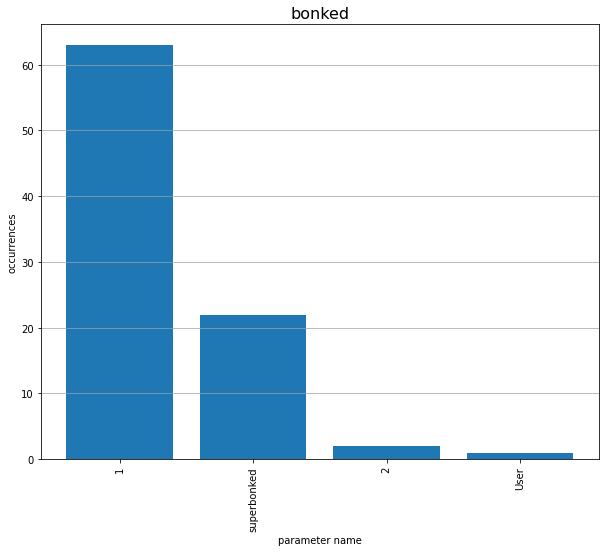

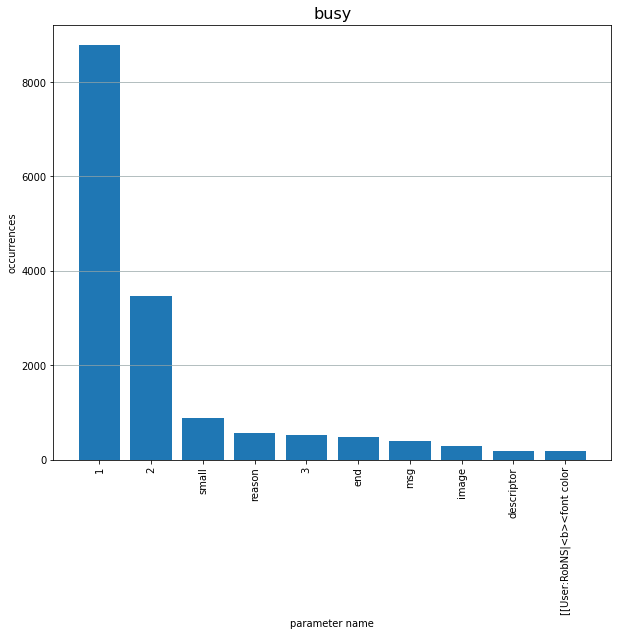

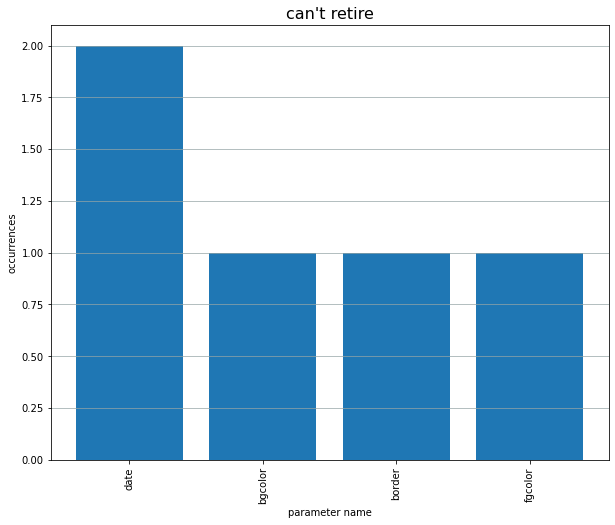

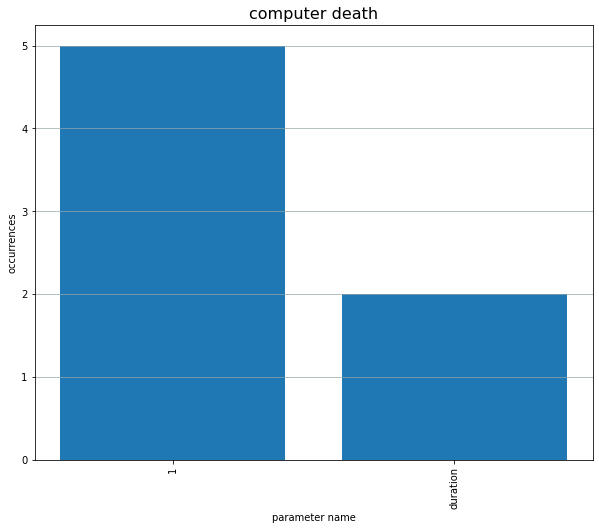

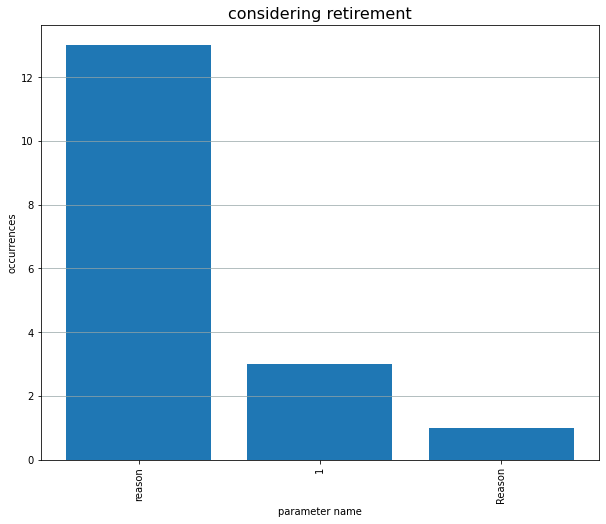

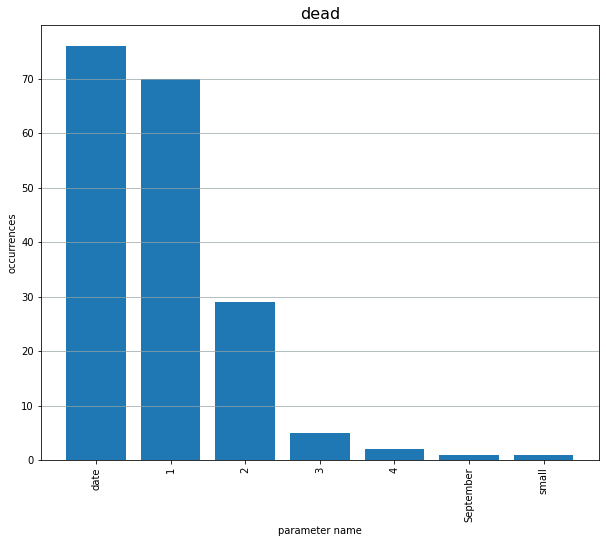

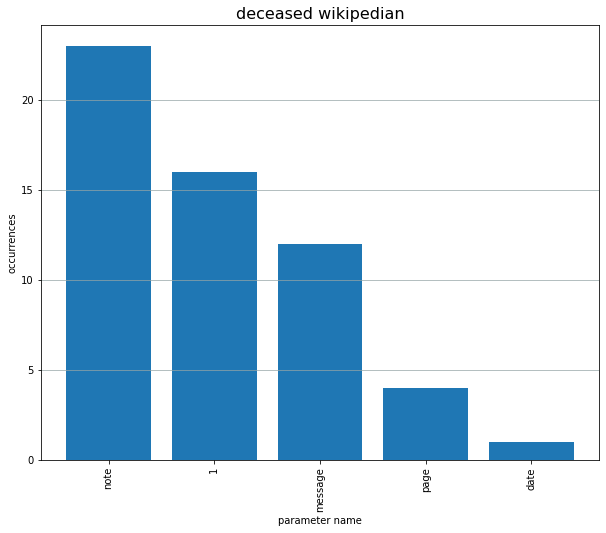

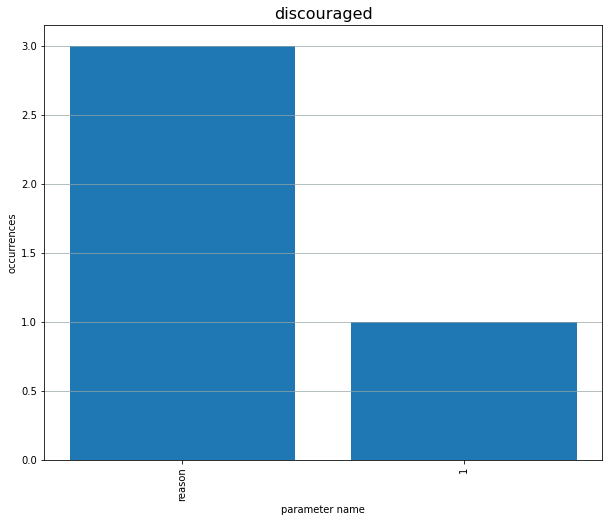

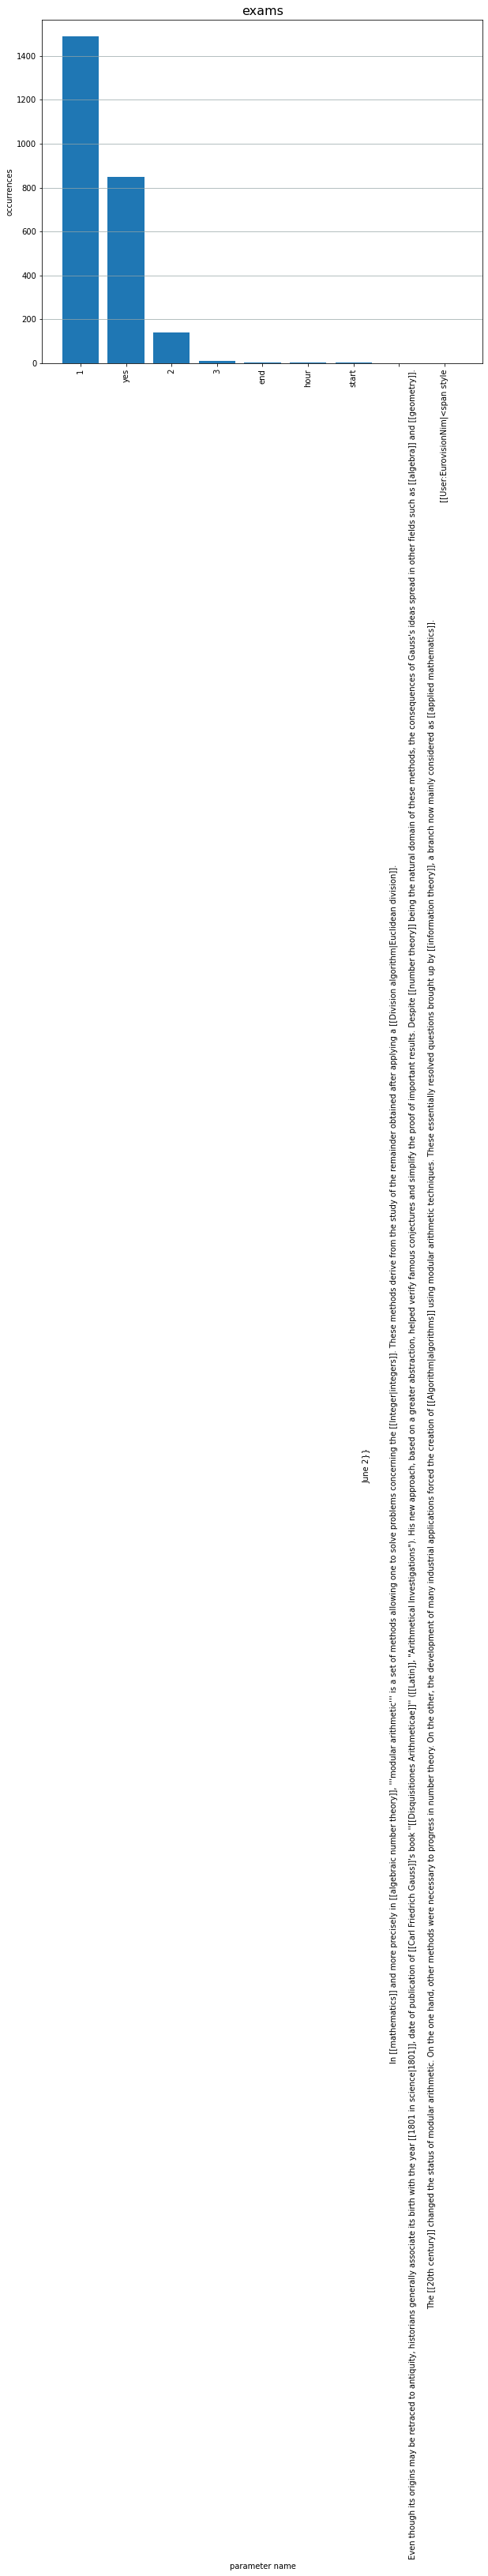

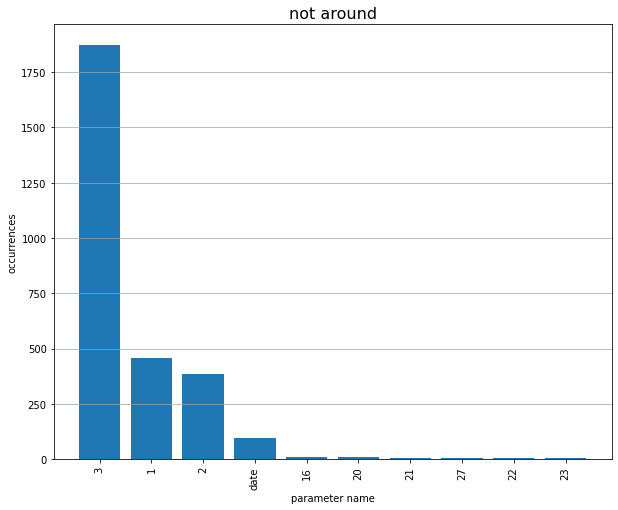

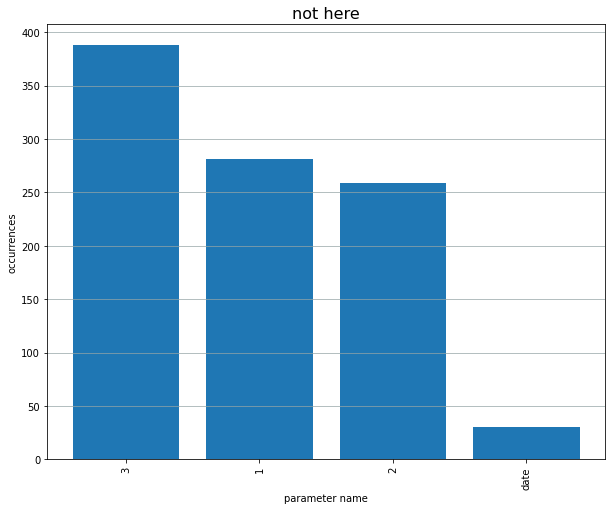

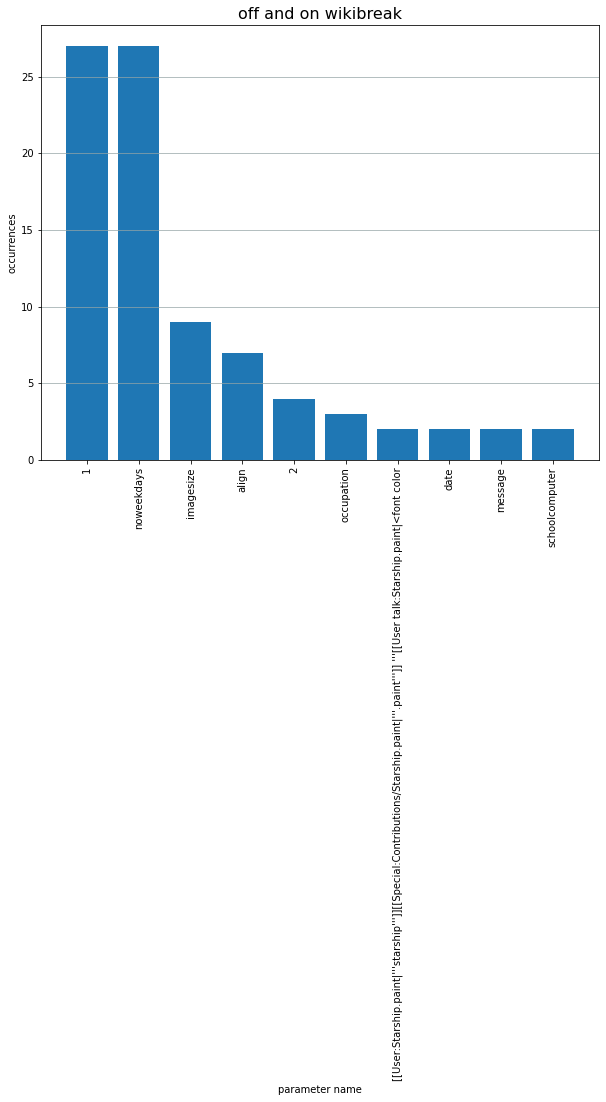

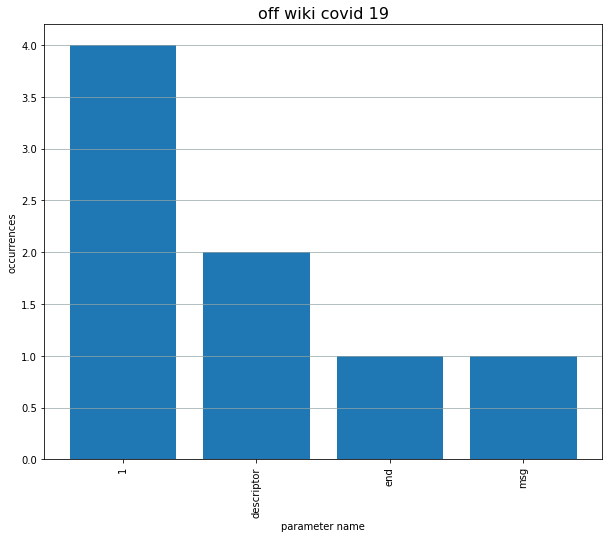

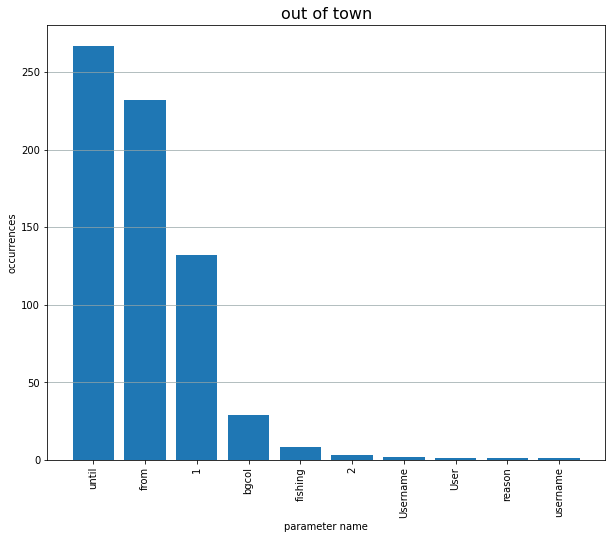

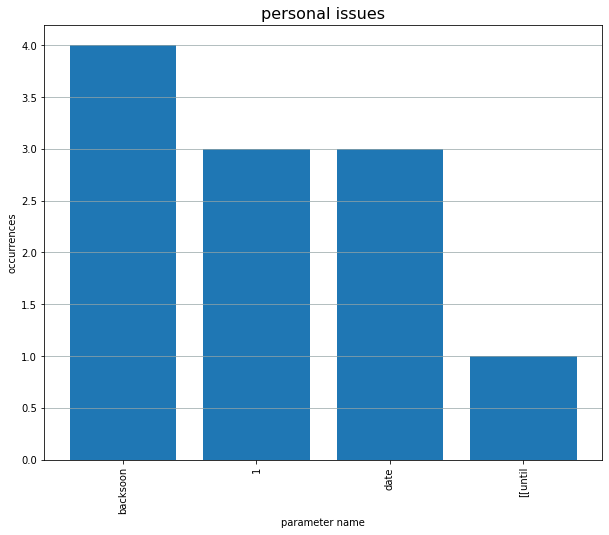

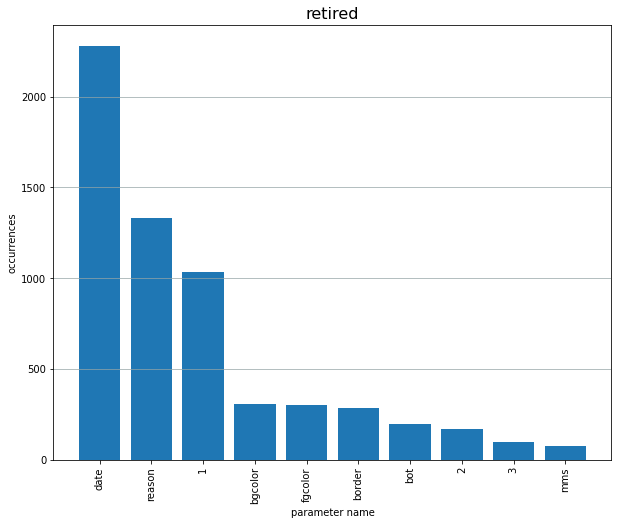

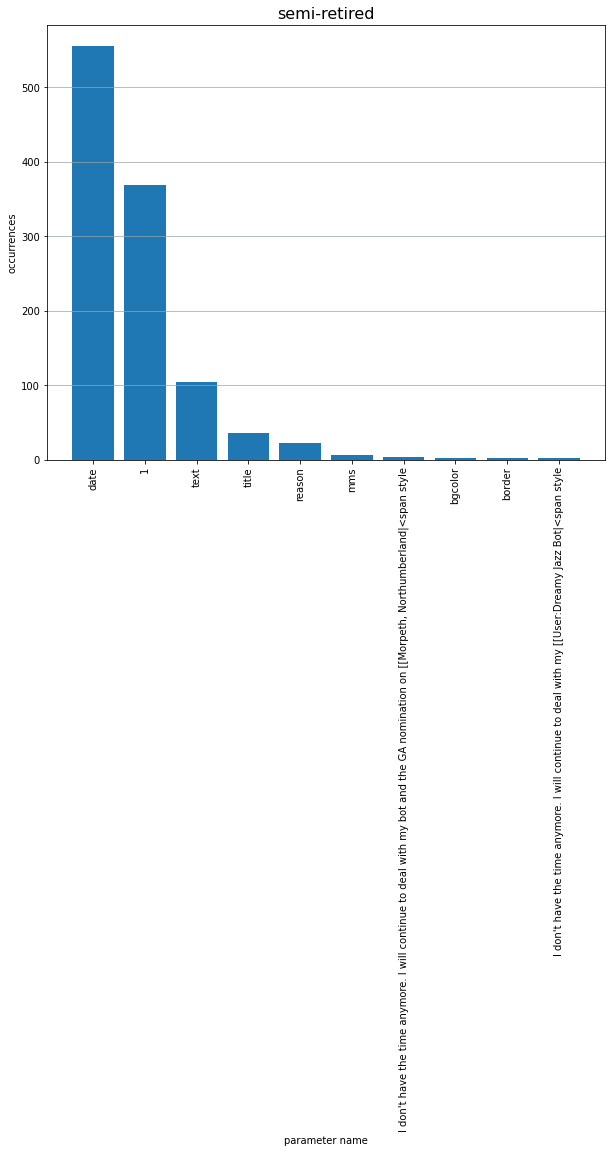

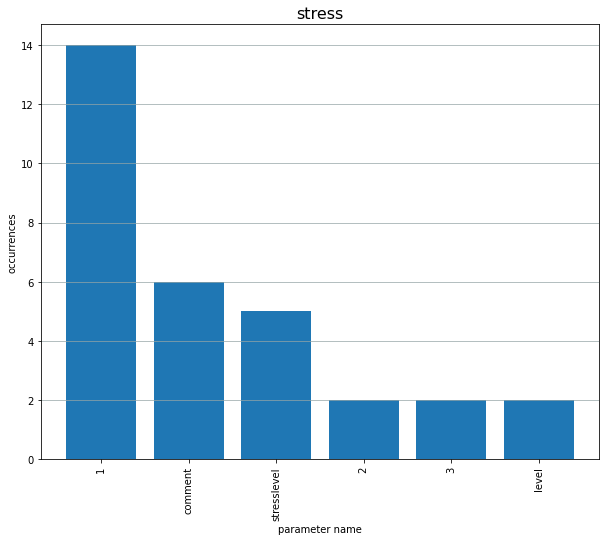

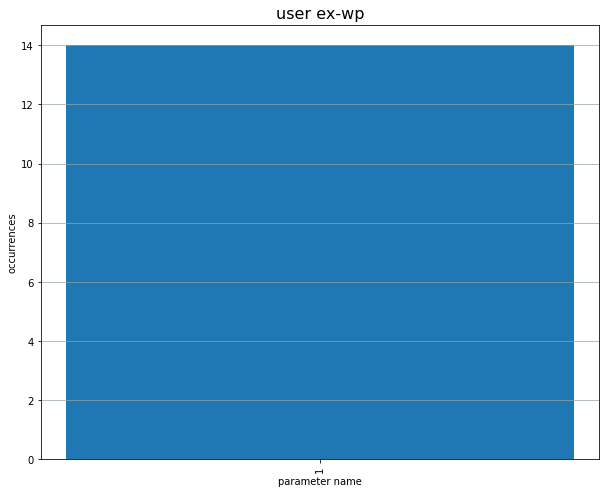

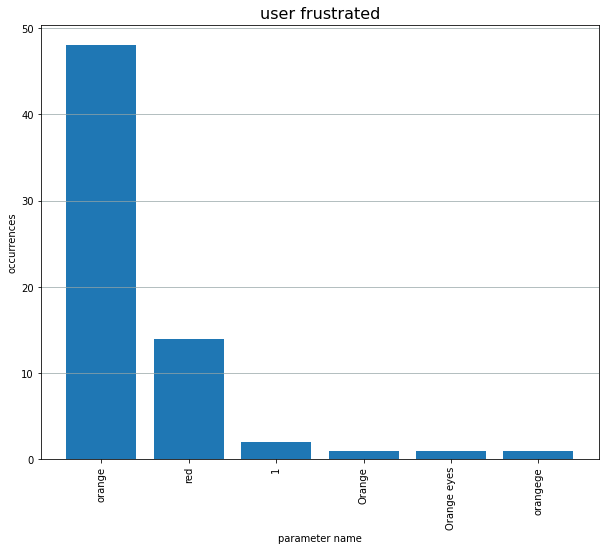

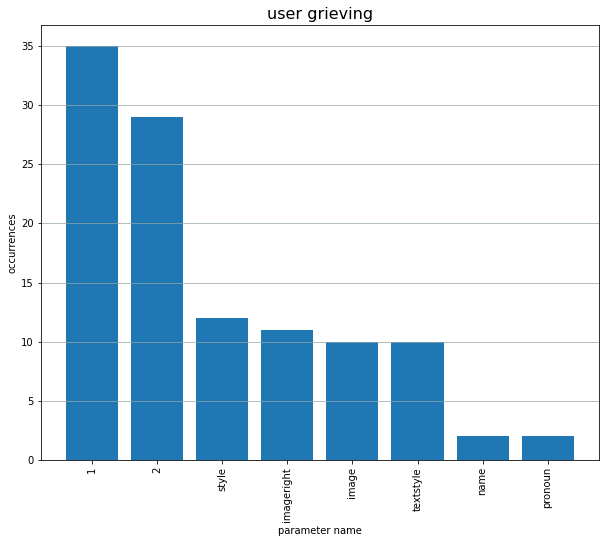

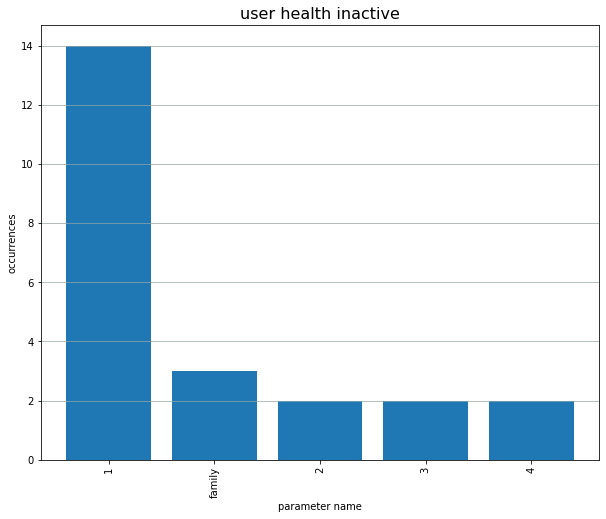

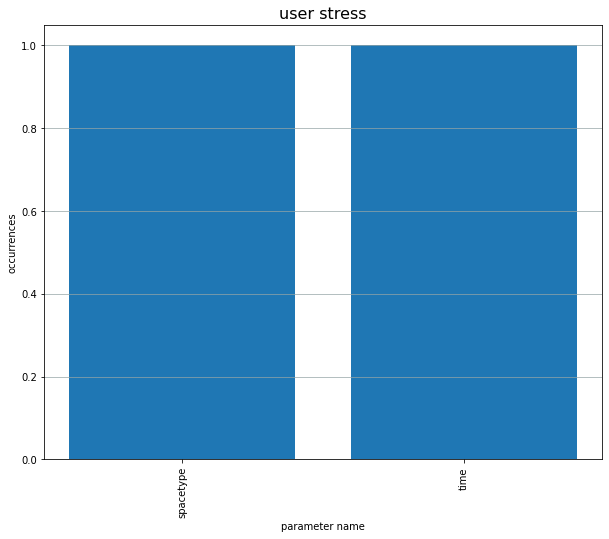

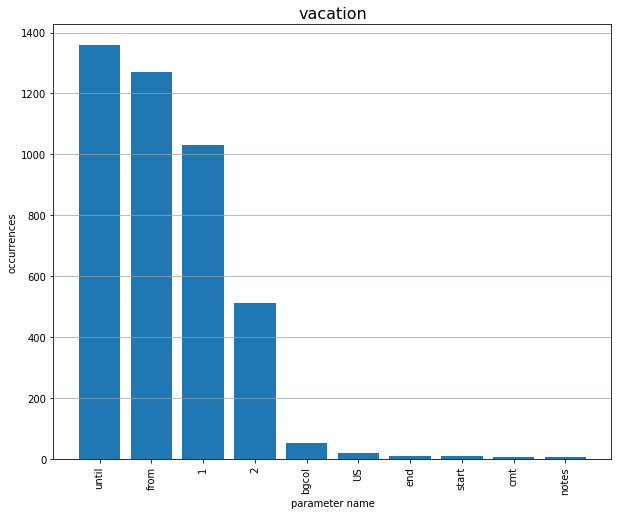

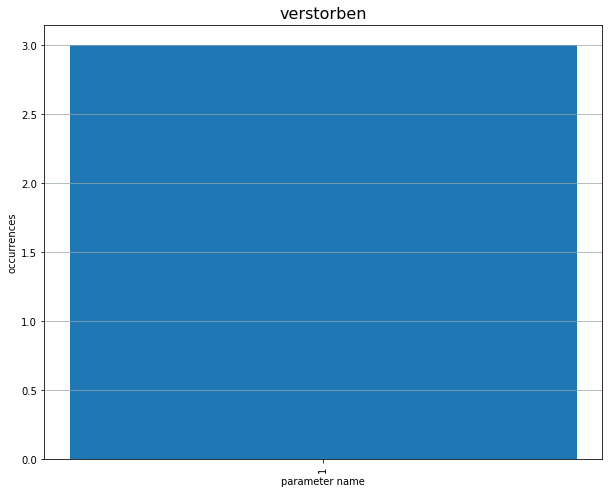

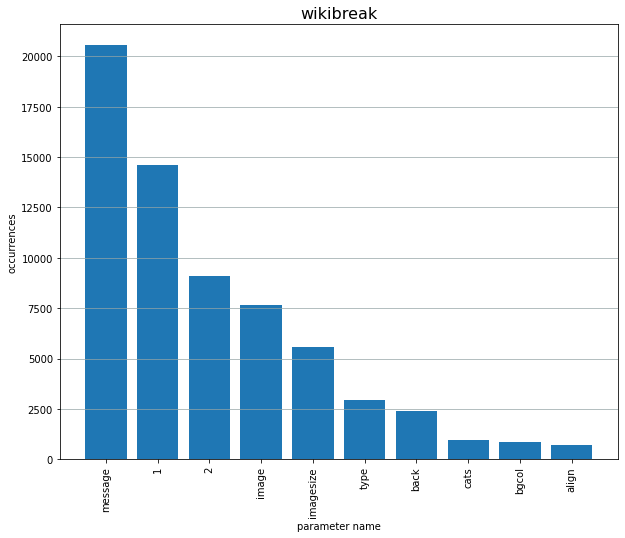

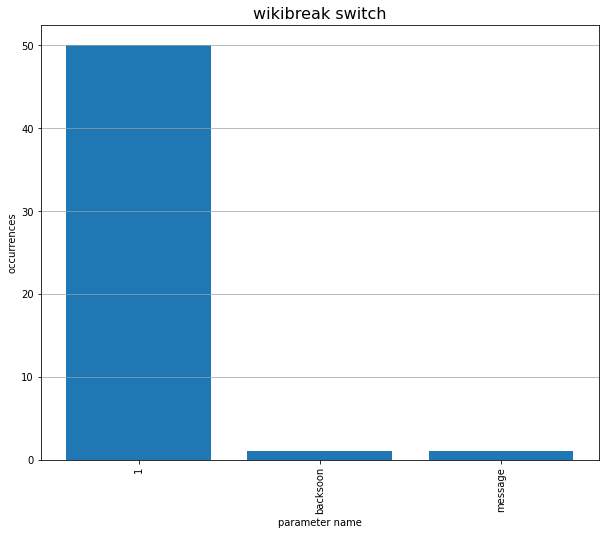

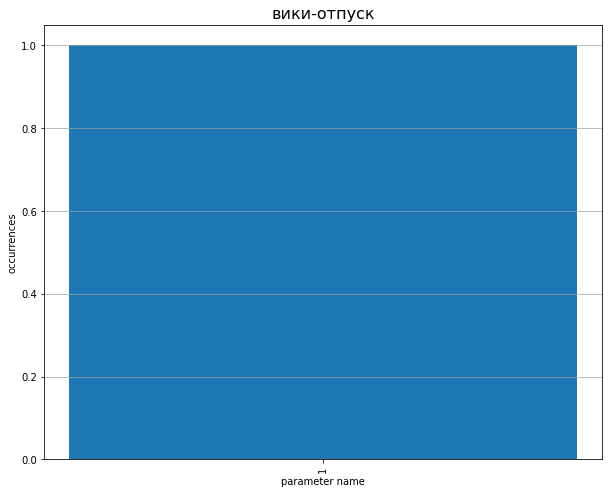

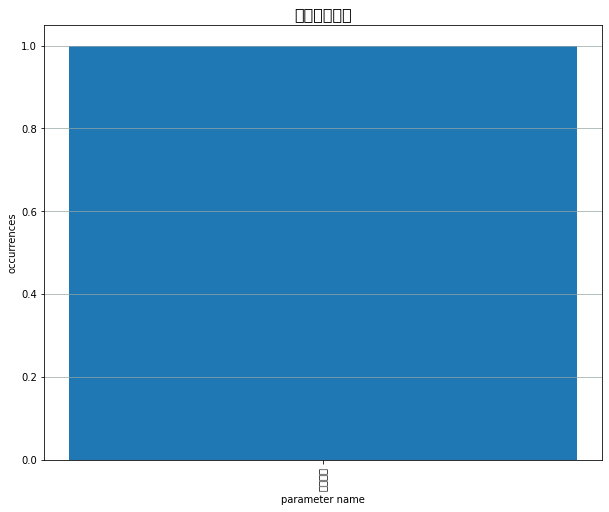

In [173]:
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_grouped_df_list[i]
    
    if not extracted.empty:
        extracted = extracted.sort_values(by=['count'], ascending = False)
        first_five = extracted[:10]
        
        plt.figure(figsize=(10,8))
        plt.bar(first_five['param_name'], first_five['count'])
        plt.title(wikibreak, fontsize=16)
        plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
        plt.xticks(rotation='vertical')
        plt.ylabel('occurrences')
        plt.xlabel('parameter name')
        plt.show()

## Some paramers in textual form

In [189]:
to_print = {
    'retired': ['reason', '1', 'mms'],
    'bonked': ['1', 'superbonked'],
    'off and on wikibreaks': ['1'],
    'user ex-wp': ['1'],
    'semi-retired': ['1', 'reason', 'Reason'],
    'considering retirement': ['reason', '1', 'mms'],
    'wikibreak': ['message', '1', '2']
}

In [190]:
for i, wikibreak in enumerate(wikibreaks):
    if wikibreak in to_print:
        with open('english_motivations_{}.txt'.format(wikibreak), 'w') as output_file:
            # grouping
            extracted = most_used_parameters_per_template_df_list[i].drop_duplicates()
            if not extracted.empty:
                output_file.write('{}:\n'.format(wikibreak.upper()))
                output_file.write('------------------------------------------------------------------\n')
                for param in to_print[wikibreak]:
                    for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
                        output_file.write('Param name: {} param value: {} occurrences: {}\n'.format(val['param_name'], val['param_value'], val['count']))
                output_file.write('------------------------------------------------------------------\n')